# **Multivariate Analysis on Diabetes Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from scipy.spatial.distance import pdist


In [3]:
# !pip install factor_analyzer

In [4]:
dt =pd.read_csv(r"S:\My Projects\Multivariate\diabetes.csv")
dt.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### Basic Information for data

In [6]:
dt.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
dt.shape

(768, 9)

# Exploratory Data Analysis (EDA)

In [10]:
dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA

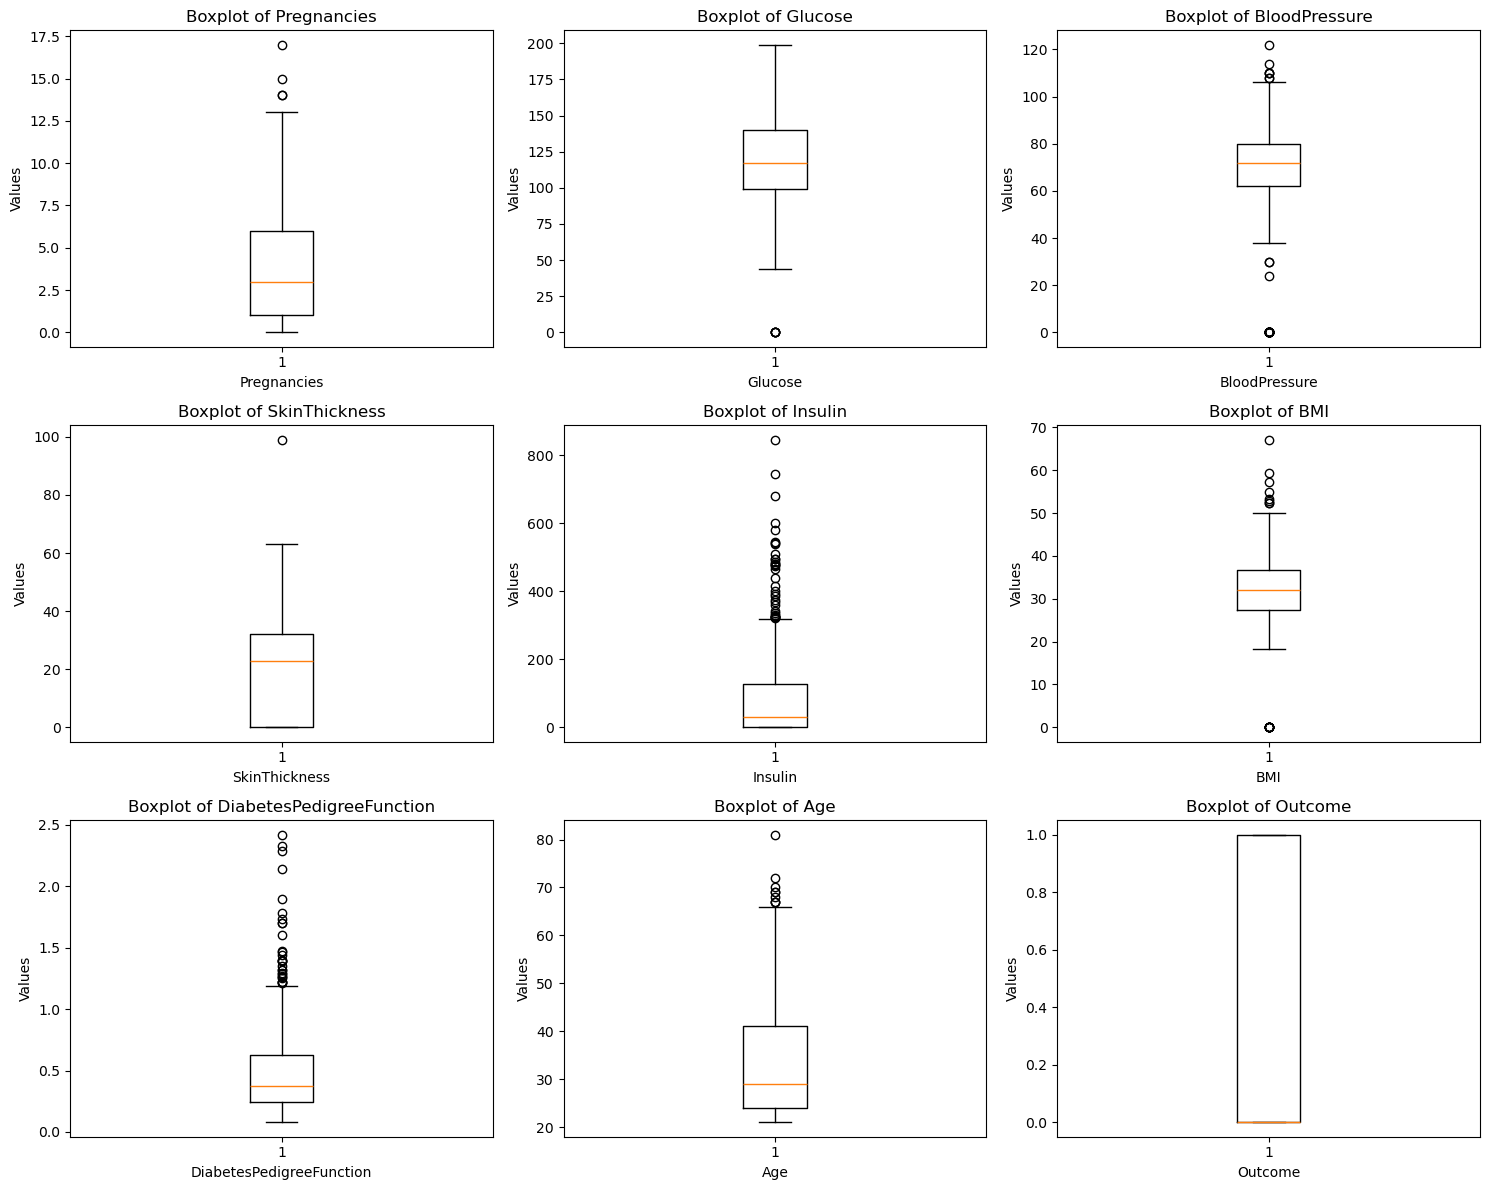

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  
axes = axes.flatten()
for i, column in enumerate(dt.columns[:9]):  # Limiting to 9 columns
    axes[i].boxplot(dt[column])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

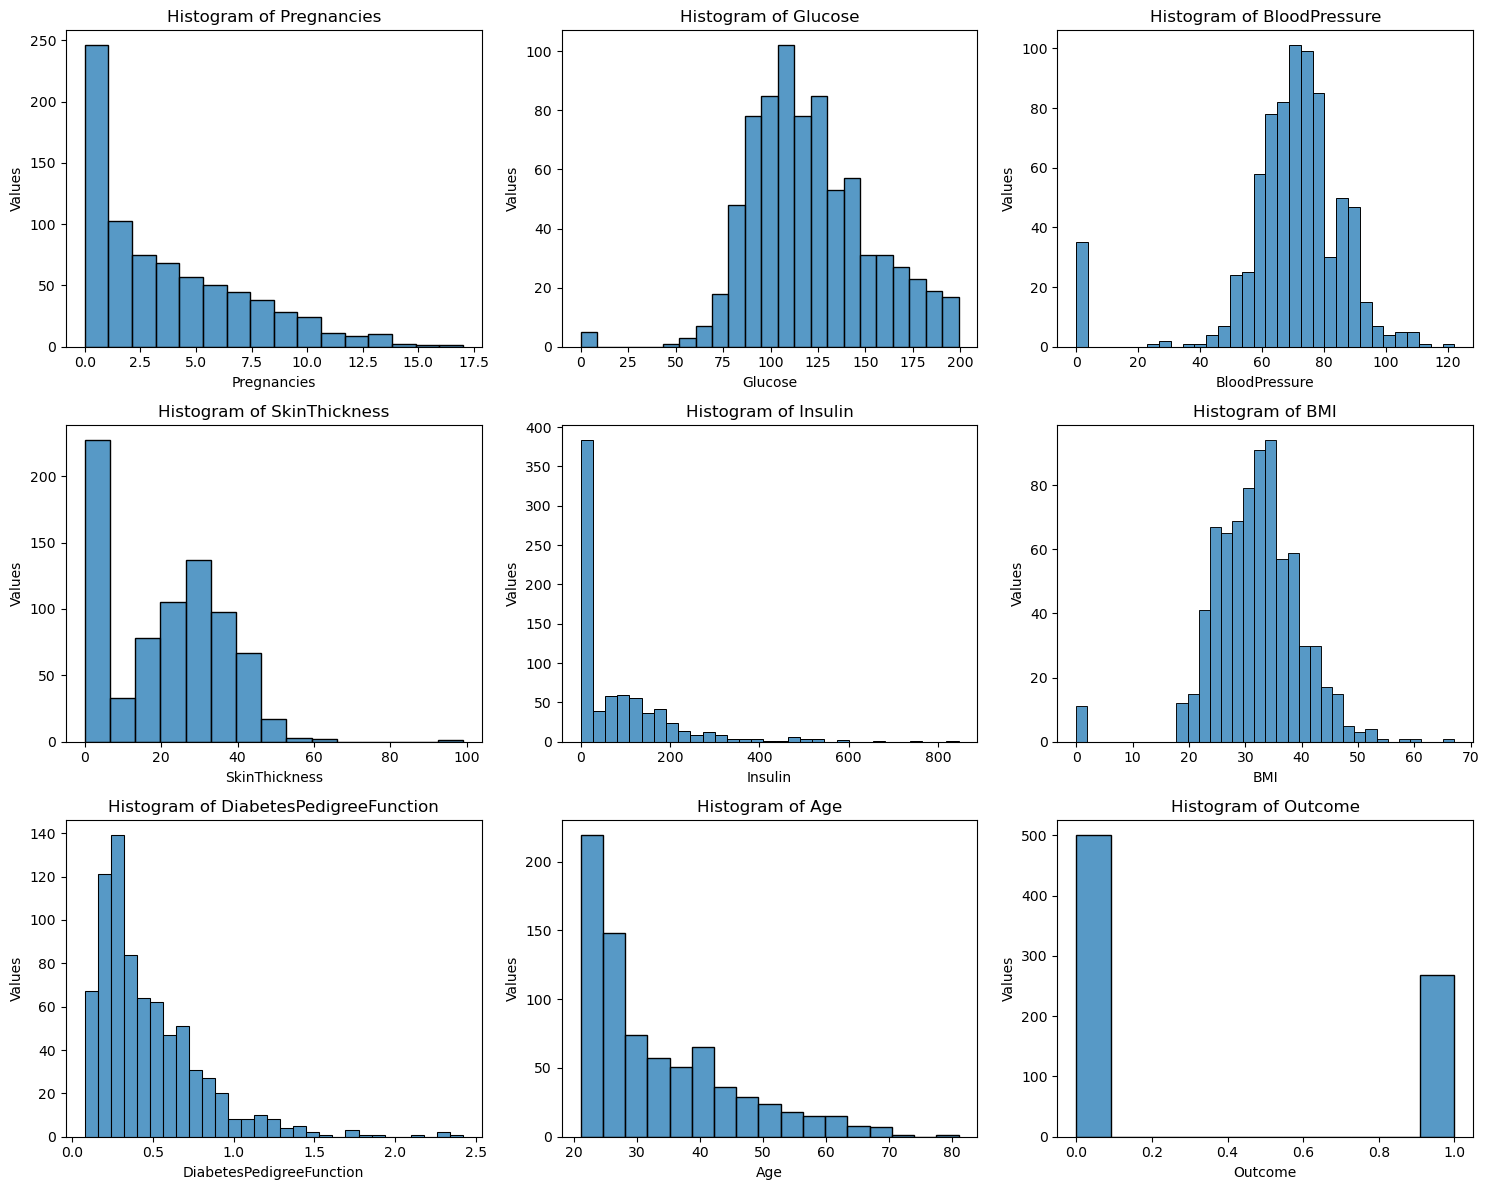

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  
axes = axes.flatten()
for i, column in enumerate(dt.columns[:9]):  
    sns.histplot(dt[column], ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

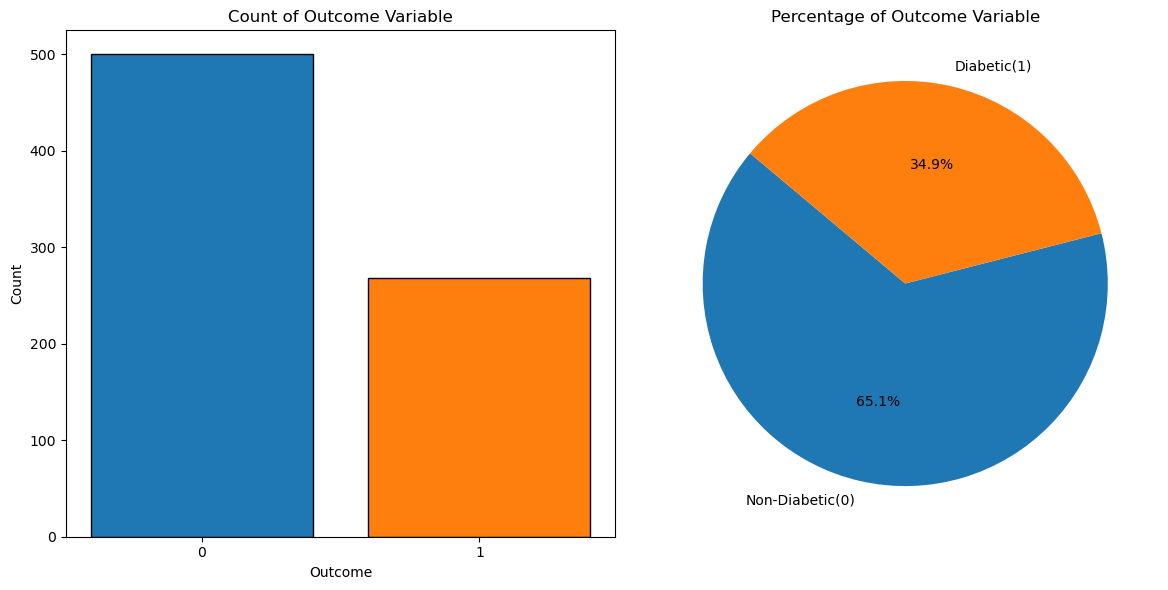

In [14]:
colors = ['#1f77b4', '#ff7f0e']  

counts = dt['Outcome'].value_counts()
labels_barplot = ['0', '1']  
labels_piechart = ['Non-Diabetic(0)', 'Diabetic(1)'] 

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(counts.index, counts.values, color=colors, edgecolor='black')
axs[0].set_title('Count of Outcome Variable')
axs[0].set_xlabel('Outcome')
axs[0].set_ylabel('Count')
axs[0].set_xticks(counts.index)
axs[0].set_xticklabels(labels_barplot)

axs[1].pie(counts, labels=labels_piechart, autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title('Percentage of Outcome Variable')

plt.tight_layout()
plt.show()

In [15]:
dt[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dt[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [16]:
dt.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

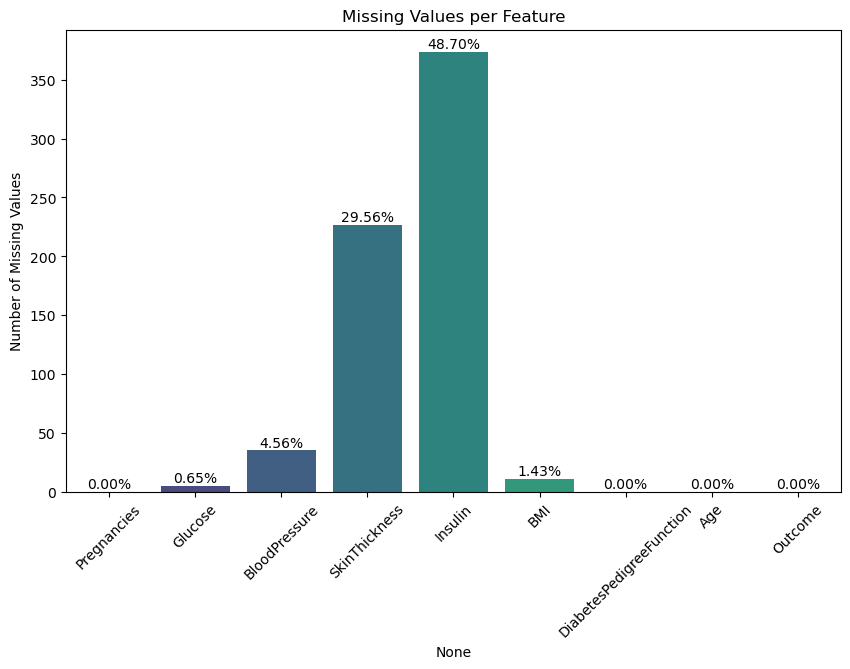

In [17]:
missing_values = dt.isnull().sum()
missing_percentage = (missing_values / len(dt)) * 100

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

# Adding the percentage of missing values above each bar
for bar, percent in zip(bars.patches, missing_percentage):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{percent:.2f}%', 
             ha='center', va='bottom')

plt.title('Missing Values per Feature')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

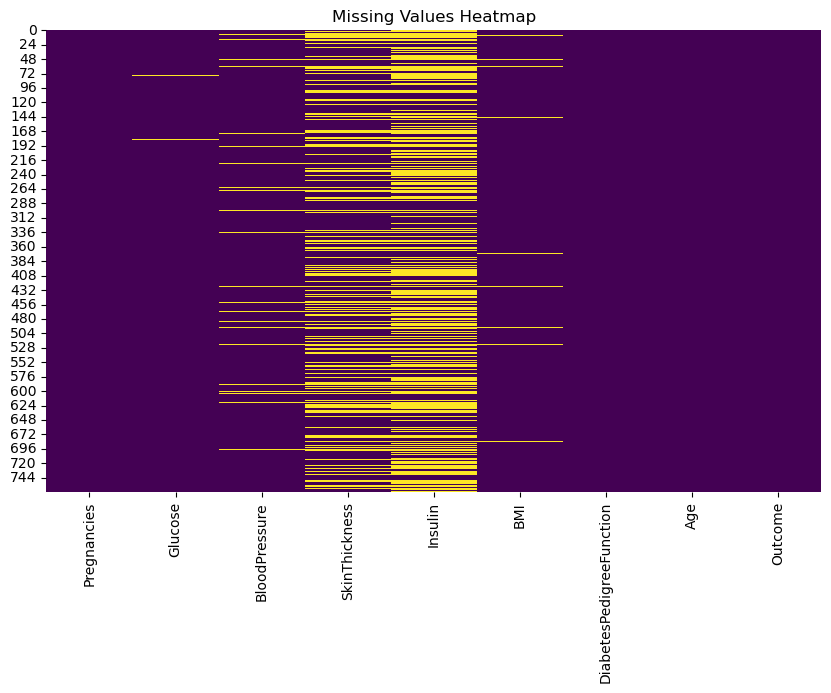

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(dt.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Train Test Split

In [20]:
X = dt.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target column
y = dt['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Removing missing values

In [22]:
# Define imputation strategies for different columns
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_knn = KNNImputer(n_neighbors=5)

# Define columns for each imputation strategy
mean_columns = ['Glucose']
median_columns = ['BloodPressure', 'SkinThickness']
knn_columns = ['Insulin', 'BMI']

In [23]:
# Apply imputations to the training set
X_train_mean_imputed = imputer_mean.fit_transform(X_train[mean_columns])
X_train_median_imputed = imputer_median.fit_transform(X_train[median_columns])
X_train_knn_imputed = imputer_knn.fit_transform(X_train[knn_columns])

# Transform the test set using the same imputers fitted on the training data
X_test_mean_imputed = imputer_mean.transform(X_test[mean_columns])
X_test_median_imputed = imputer_median.transform(X_test[median_columns])
X_test_knn_imputed = imputer_knn.transform(X_test[knn_columns])

In [24]:
# Reconstruct the training and test DataFrames after imputation
X_train_imputed = X_train.copy()
X_train_imputed[mean_columns] = X_train_mean_imputed
X_train_imputed[median_columns] = X_train_median_imputed
X_train_imputed[knn_columns] = X_train_knn_imputed

X_test_imputed = X_test.copy()
X_test_imputed[mean_columns] = X_test_mean_imputed
X_test_imputed[median_columns] = X_test_median_imputed
X_test_imputed[knn_columns] = X_test_knn_imputed

In [25]:
X_train_imputed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,72.0,28.5,154.330247,32.352224,0.304,21
618,9,112.0,82.0,24.0,93.400000,28.200000,1.282,50
346,1,139.0,46.0,19.0,83.000000,28.700000,0.654,22
294,0,161.0,50.0,28.5,93.200000,21.900000,0.254,65
231,6,134.0,80.0,37.0,370.000000,46.200000,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139.0,64.0,35.0,140.000000,28.600000,0.411,26
106,1,96.0,122.0,28.5,77.000000,22.400000,0.207,27
270,10,101.0,86.0,37.0,182.600000,45.600000,1.136,38
435,0,141.0,72.0,28.5,211.000000,42.400000,0.205,29


## Feature Engineering

#### Outlier Identification using the IQR Method

In [27]:
def identify_outliers(df):
    outliers_dict = {}
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = outliers
    
    return outliers_dict

# Identify outliers in the training set
outliers_by_column_train = identify_outliers(X_train_imputed)

# Output the outliers for each column in the training set
for column, outliers in outliers_by_column_train.items():
    print(f"Outlier points for '{column}' in training set:\n", outliers)
    print("\n")

# Optionally, check for outliers in the test set
outliers_by_column_test = identify_outliers(X_test_imputed)

# Output the outliers for each column in the test set
for column, outliers in outliers_by_column_test.items():
    print(f"Outlier points for '{column}' in test set:\n", outliers)
    print("\n")

Outlier points for 'Pregnancies' in training set:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15    136.0           70.0           32.0    110.0  37.1   
298           14    100.0           78.0           25.0    184.0  36.6   
159           17    163.0           72.0           41.0    114.0  40.9   
455           14    175.0           62.0           30.0    197.8  33.6   

     DiabetesPedigreeFunction  Age  
88                      0.153   43  
298                     0.412   46  
159                     0.817   47  
455                     0.212   38  


Outlier points for 'Glucose' in training set:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
561            0    198.0           66.0           32.0    274.0  41.3   
661            1    199.0           76.0           43.0    155.6  42.9   

     DiabetesPedigreeFunction  Age  
561                     0.502   28  
661                     1.394   22  


Outlier 

**Pregnancies:**
Keep the Outliers in Pregnancies: Pregnancies: 15, 17, 14, 14 These values are valid and potential outliers, even if rare, and may hold important information for our analysis.


**1. Pregnancies**
- Outliers Identified: 4 data points.
- Interpretation: With only 4 outliers, this suggests that the majority of the data points fall within a typical range for the number of pregnancies.
- **Recommendation:**
  Review: Examine these outlier cases to determine if they are genuine extreme values or data entry errors.
- **Action:** If they are valid, consider keeping them as they may represent real-world variability. If they are errors, consider correcting or removing them.
  
**2. Glucose**
- Outliers Identified: No outliers.
- Interpretation: The glucose levels in your dataset are well-distributed without extreme values.
- **Recommendation:**
- **Action:** No immediate action is required. However, ensure that the absence of outliers isn't due to data preprocessing steps that might have inadvertently removed valid extreme values.
  
**3. BloodPressure**
- Outliers Identified: 14 data points.
- Interpretation: A moderate number of outliers suggests some variability in blood pressure measurements.
- **Recommendation:**
  Review: Investigate these outliers to check for data accuracy.
- **Action:** If they are accurate, consider using robust statistical methods that are less sensitive to outliers or applying transformations if necessary.
  
**4. SkinThickness**
- Outliers Identified: 87 data points.
- Interpretation: A significant number of outliers indicates potential issues such as measurement errors or data entry mistakes.
- **Recommendation:**
  Review: Verify the accuracy of these measurements. High variability might also reflect genuine physiological differences.
- **Action:**
- Imputation: Consider imputing missing or extreme values using methods like median imputation.
- Transformation: Apply transformations (e.g., log transformation) to reduce skewness.
- Removal: If outliers are due to errors, remove or correct them.
  
**5. Insulin**
- Outliers Identified: 164 data points.
- Interpretation: A large number of outliers suggests significant variability, which might be due to biological differences, measurement errors, or data recording issues.
- **Recommendation:**
  Review: Thoroughly investigate these outliers for potential data quality issues.
- **Action:**
- Imputation: Replace extreme values with statistical measures (e.g., median).
- Transformation: Use techniques like Box-Cox transformation to stabilize variance.
- Removal: Remove if outliers are confirmed to be erroneous.
  
**6. BMI (Body Mass Index)**
- Outliers Identified: 8 data points.
- Interpretation: A small number of outliers indicate that most BMI values are within a reasonable range.
- **Recommendation:**
  Review: Check the validity of these extreme BMI values.
- **Action:**
Keep: If valid, retain them as they may provide valuable information.
Adjust: If erroneous, correct or remove them.

**7. DiabetesPedigreeFunction**
- Outliers Identified: 28 data points.
- Interpretation: A moderate number of outliers may reflect genuine variations in genetic predisposition to diabetes.
- **Recommendation:**
  Review: Ensure that these values are accurate and not the result of data entry errors.
- **Action:**
- Transformation: Apply scaling or transformation if outliers disproportionately influence analyses.
- Retention: If valid, consider keeping them to maintain the dataset's integrity.
  
**8. Age**
- Outliers Identified: 9 data points.
- Interpretation: A few outliers suggest that most ages fall within an expected range.
- **Recommendation:**
  Review: Verify the accuracy of these age entries.
- **Action:**
- Correction: Correct any erroneous ages.
- Retention: Keep valid extreme ages as they can be important for understanding age-related risk factors.
  
**9. Outcome**
- Outliers Identified: No outliers.
- Interpretation: As a binary variable (likely indicating diabetes presence), outliers are not applicable.
- **Recommendation:**
- Action: No action required.

In [29]:
# Function to cap outliers based on quantiles in the training data
def cap_outliers(train_data, test_data, column, lower_quantile=0.05, upper_quantile=0.95):
    lower_limit = train_data[column].quantile(lower_quantile)
    upper_limit = train_data[column].quantile(upper_quantile)
    train_data[column] = np.where(train_data[column] < lower_limit, lower_limit, train_data[column])
    train_data[column] = np.where(train_data[column] > upper_limit, upper_limit, train_data[column])
    test_data[column] = np.where(test_data[column] < lower_limit, lower_limit, test_data[column])
    test_data[column] = np.where(test_data[column] > upper_limit, upper_limit, test_data[column])

# Columns to cap outliers
columns_to_cap = ['BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']

# Apply outlier capping
for column in columns_to_cap:
    cap_outliers(X_train_imputed, X_test_imputed, column)

In [30]:
# Log transformation on BloodPressure
X_train_imputed['BloodPressure'] = np.log1p(X_train_imputed['BloodPressure'])
X_test_imputed['BloodPressure'] = np.log1p(X_test_imputed['BloodPressure'])

# Box-Cox transformation for Insulin (requires positive values)
X_train_imputed['Insulin'] += 1  # Shift to ensure no zero values
X_test_imputed['Insulin'] += 1

# Apply Box-Cox transformation on the training set and get lambda
transformed_data, fitted_lambda = boxcox(X_train_imputed['Insulin'].dropna())
X_train_imputed['Insulin'] = transformed_data

# Apply the same transformation to the test set
X_test_imputed['Insulin'] = (X_test_imputed['Insulin']) ** fitted_lambda - 1

In [31]:
# Calculate z-scores for Insulin in the training set
median_insulin = X_train_imputed['Insulin'].median()
mean_insulin = X_train_imputed['Insulin'].mean()
std_insulin = X_train_imputed['Insulin'].std()
X_train_imputed['Insulin_zscore'] = (X_train_imputed['Insulin'] - mean_insulin) / std_insulin

# Replace Insulin values with median if z-score exceeds ±2.5
X_train_imputed['Insulin'] = X_train_imputed.apply(
    lambda row: median_insulin if abs(row['Insulin_zscore']) > 2.5 else row['Insulin'],
    axis=1
)

# Drop the z-score column
X_train_imputed.drop(columns=['Insulin_zscore'], inplace=True)

# Winsorize Insulin in the training set
X_train_imputed['Insulin'] = winsorize(X_train_imputed['Insulin'], limits=[0.1, 0.1])

In [32]:
# Define stricter bounds for Insulin after winsorization in the training set
upper_bound = X_train_imputed['Insulin'].quantile(0.95)
lower_bound = X_train_imputed['Insulin'].quantile(0.05)

# Replace extreme Insulin values with the median in the training set
X_train_imputed['Insulin'] = X_train_imputed['Insulin'].apply(
    lambda x: median_insulin if (x > upper_bound or x < lower_bound) else x
)

# Display results
print("Blood Pressure after Log Transformation in Training Set:")
print(X_train_imputed['BloodPressure'].describe())
print("\nBlood Pressure after Log Transformation in Test Set:")
print(X_test_imputed['BloodPressure'].describe())
print("\nInsulin after final processing in training set:")
print(X_train_imputed['Insulin'].describe())

Blood Pressure after Log Transformation in Training Set:
count    614.000000
mean       4.281294
std        0.147168
min        3.970292
25%        4.174387
50%        4.290459
75%        4.394449
max        4.510860
Name: BloodPressure, dtype: float64

Blood Pressure after Log Transformation in Test Set:
count    154.000000
mean       4.285589
std        0.142339
min        3.970292
25%        4.178204
50%        4.290459
75%        4.369448
max        4.510860
Name: BloodPressure, dtype: float64

Insulin after final processing in training set:
count    614.000000
mean       5.847759
std        0.558778
min        4.918471
25%        5.398636
50%        5.892196
75%        6.317737
max        6.676913
Name: Insulin, dtype: float64


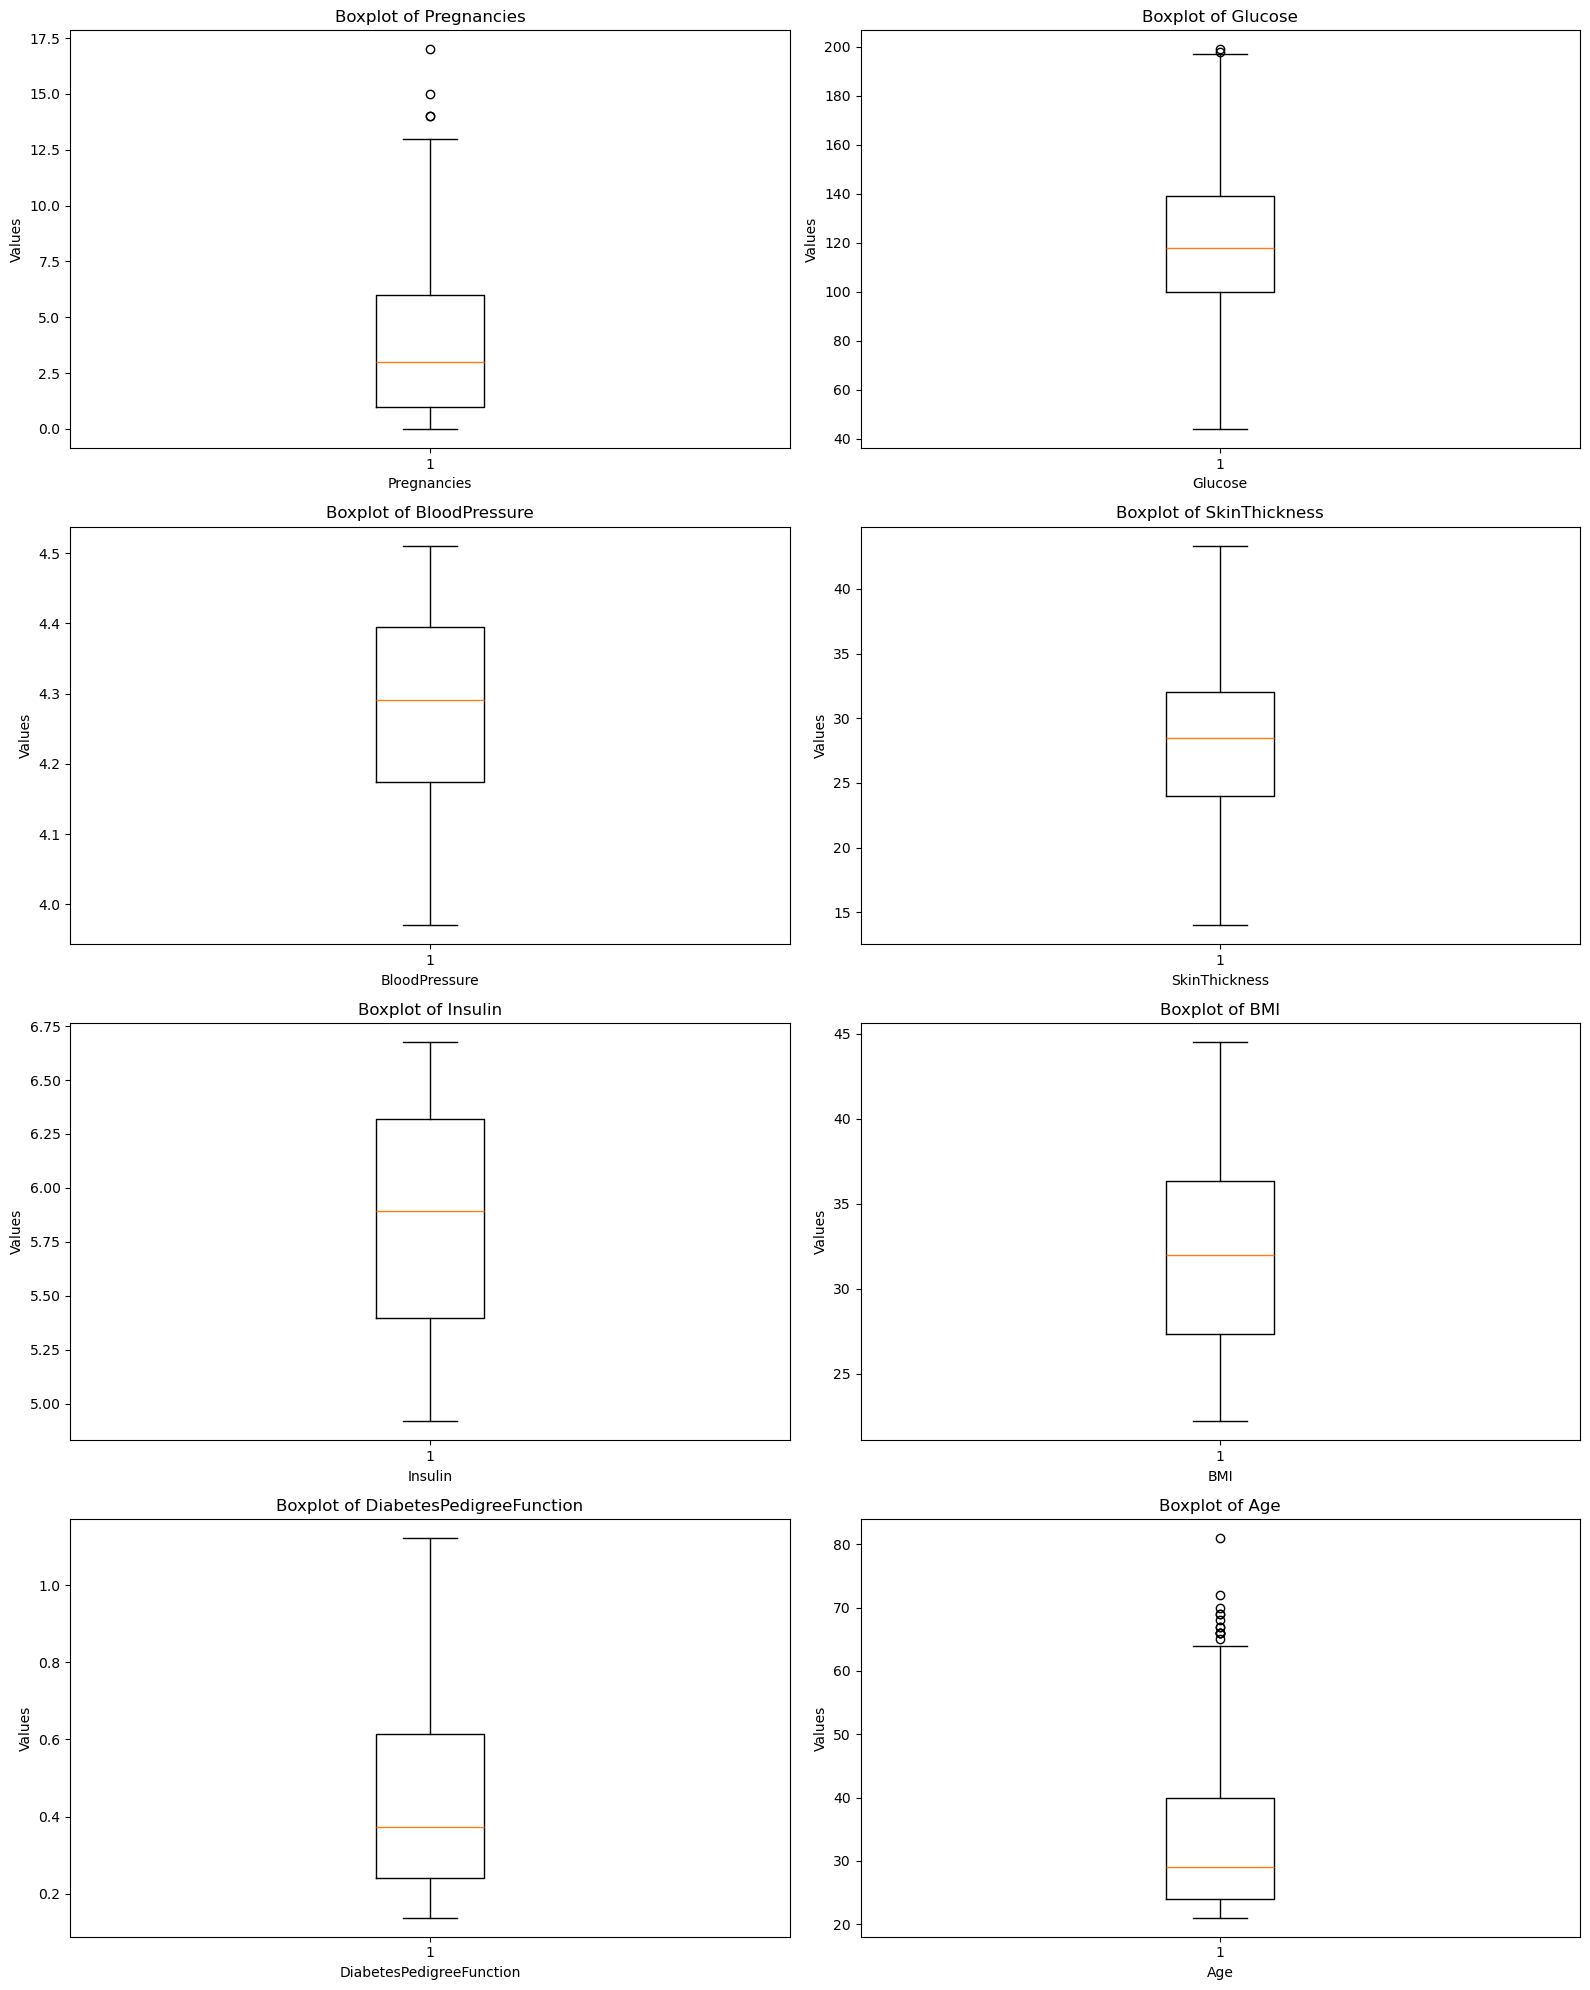

In [33]:
fig, axes = plt.subplots(4, 2, figsize=(16, 20))  
axes = axes.flatten()
for i, column in enumerate(X_train_imputed.columns[:9]):  # Limiting to 9 columns
    axes[i].boxplot(X_train_imputed[column])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

## Scaling

In [35]:
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


X_train = pd.DataFrame(X_train_scaled, columns=X_train_imputed.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test_imputed.columns)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.258326,0.062327,0.007037,0.444180,0.021228,-0.543723,-1.035940
1,1.588046,-0.327397,0.935385,-0.579508,-0.820215,-0.642097,2.463927,1.487101
2,-0.828460,0.570284,-2.114977,-1.231225,-1.109998,-0.562221,0.743641,-0.948939
3,-1.130523,1.301728,-2.114977,0.007037,-0.825502,-1.600607,-0.727632,2.792122
4,0.681856,0.404047,0.769511,1.114956,1.485080,1.967446,-0.786483,1.139095


In [36]:
X_train.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.142265,0.196413,0.111554,0.142286,0.030669,0.005082,0.553048
Glucose,0.142265,1.000000,0.215587,0.132876,0.392458,0.228450,0.110331,0.275763
BloodPressure,0.196413,0.215587,1.000000,0.198231,0.163665,0.281045,0.046574,0.333845
SkinThickness,0.111554,0.132876,0.198231,1.000000,0.246148,0.571291,0.072421,0.111747
Insulin,0.142286,0.392458,0.163665,0.246148,1.000000,0.447597,0.098277,0.133937
BMI,0.030669,0.228450,0.281045,0.571291,0.447597,1.000000,0.146975,0.020028
DiabetesPedigreeFunction,0.005082,0.110331,0.046574,0.072421,0.098277,0.146975,1.000000,0.034192
Age,0.553048,0.275763,0.333845,0.111747,0.133937,0.020028,0.034192,1.000000


# **Dimensionality Reduction**
## a. Principal Component Analysis (PCA)
PCA reduces the dimensionality of the dataset while retaining most of the variance.

#### 1. Compute Covariance Matrix

In [39]:
mean_vec = np.mean(X_train, axis=0)
cov_mat = np.cov(X_train, rowvar=False)  # Calculate covariance matrix

print('Covariance matrix:\n', cov_mat)

Covariance matrix:
 [[1.00163132 0.1424966  0.19673351 0.11173606 0.14251775 0.03071913
  0.00509008 0.55395062]
 [0.1424966  1.00163132 0.21593891 0.13309268 0.393098   0.22882288
  0.110511   0.27621332]
 [0.19673351 0.21593891 1.00163132 0.19855473 0.16393237 0.28150394
  0.0466501  0.33438973]
 [0.11173606 0.13309268 0.19855473 1.00163132 0.24654938 0.57222247
  0.07253945 0.11192944]
 [0.14251775 0.393098   0.16393237 0.24654938 1.00163132 0.44832673
  0.09843683 0.13415529]
 [0.03071913 0.22882288 0.28150394 0.57222247 0.44832673 1.00163132
  0.14721488 0.02006044]
 [0.00509008 0.110511   0.0466501  0.07253945 0.09843683 0.14721488
  1.00163132 0.03424771]
 [0.55395062 0.27621332 0.33438973 0.11192944 0.13415529 0.02006044
  0.03424771 1.00163132]]


#### 2. Eigen Decomposition

In [41]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors:\n', eig_vecs)
print('\nEigenvalues:\n', eig_vals)

Eigenvectors:
 [[ 0.29721096  0.53767637  0.07172583  0.59460165 -0.19470298 -0.44373118
  -0.10717031  0.13259698]
 [ 0.37427087  0.0411116   0.00940395  0.26841441  0.58134094  0.15739147
   0.4476292  -0.47222363]
 [ 0.36266927  0.14570669  0.21381212  0.11944769 -0.23943466  0.8152882
  -0.19716333  0.16235763]
 [ 0.38100098 -0.3227152   0.49111057 -0.1343817   0.429941   -0.24765957
  -0.42908581  0.24727711]
 [ 0.41144128 -0.20680325  0.2897834  -0.27258113 -0.59091485 -0.2162309
   0.22359331 -0.42865309]
 [ 0.43222897 -0.44674451 -0.72902955  0.16784783 -0.09204547 -0.03503417
  -0.19749349  0.07236745]
 [ 0.14022393 -0.1534295   0.0638916  -0.0061853  -0.04072103 -0.03300578
   0.6899403   0.68841197]
 [ 0.34514874  0.56387017 -0.29718871 -0.6629968   0.15048026 -0.05681437
  -0.01180487  0.09500183]]

Eigenvalues:
 [2.4520407  1.49792104 0.34468901 0.40584041 0.59135436 0.79516299
 1.00327009 0.92277197]


#### 3. Selecting Principal Components

In [43]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.4520407004264957
1.4979210412019541
1.0032700919418795
0.9227719721041948
0.7951629853279915
0.5913543558704367
0.40584040934181537
0.3446890147477158


#### 4. Explained Variance

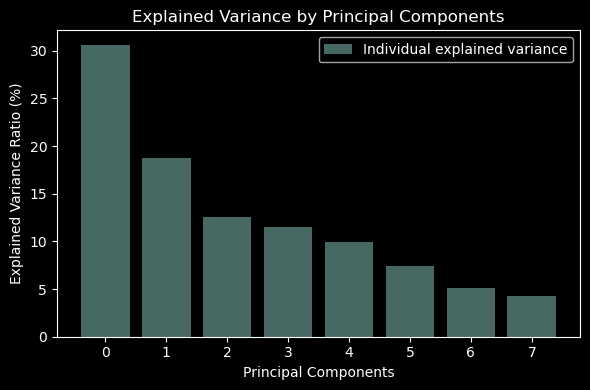

In [45]:
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
    plt.ylabel('Explained Variance Ratio (%)')
    plt.xlabel('Principal Components')
    plt.title('Explained Variance by Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

#### 5. Scree Plot

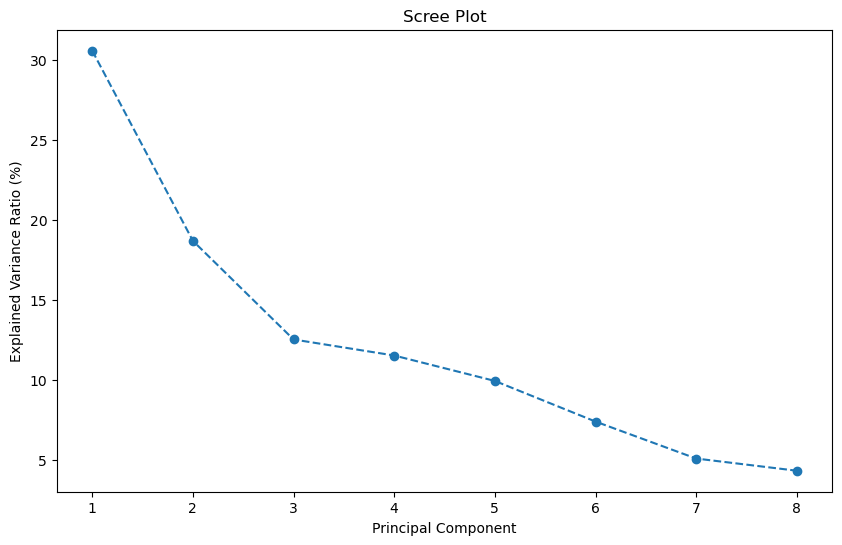

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(var_exp) + 1), var_exp, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio (%)')
plt.show()

#### 6. Perform PCA

In [49]:
n_components = 7  # Adjust this based on your explained variance analysis
pca_final = PCA(n_components=n_components)

X_pca_final = pca_final.fit_transform(X_train)  
X_pca_test = pca_final.transform(X_test)

# Get explained variance ratios and cumulative variance
explained_variance_ratio = pca_final.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

In [50]:
# Convert PCA transformed data into DataFrames for easier handling
X_pca_final_df = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(n_components)])
X_pca_test_df = pd.DataFrame(X_pca_test, columns=[f'PC{i+1}' for i in range(n_components)])

#### 7. Plot Explained Variance

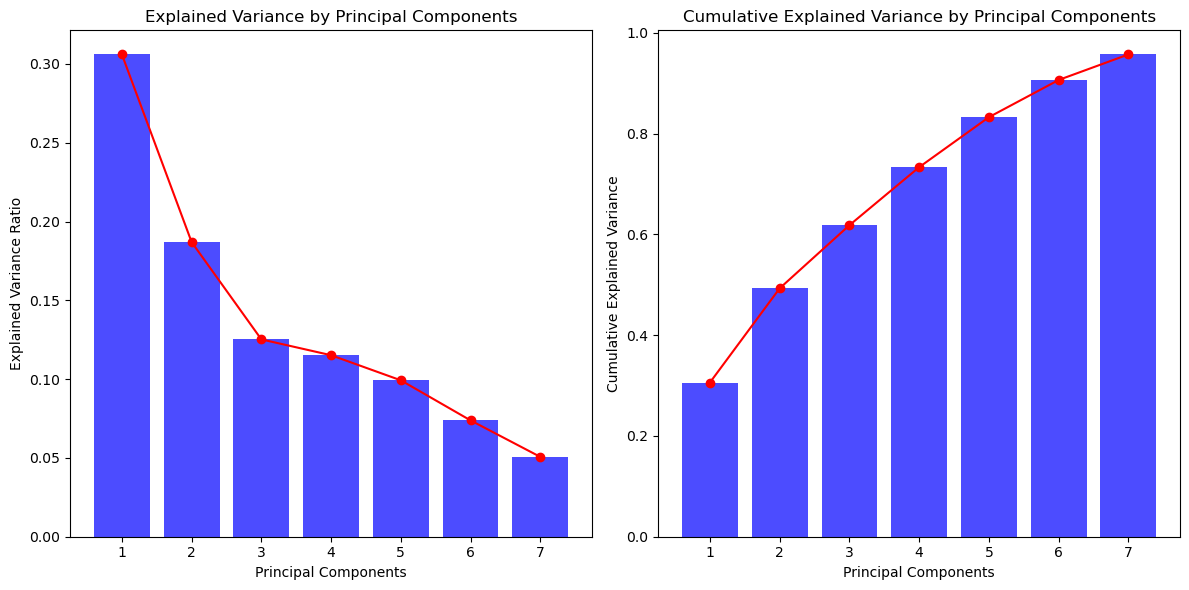

In [52]:
plt.figure(figsize=(12, 6))

# Plot individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', color='b')
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='r', marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))  # Set x-ticks to component numbers

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.bar(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, alpha=0.7, align='center', color='b')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, color='r', marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))  # Set x-ticks to component numbers

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### 8. Create DataFrame for Variance Analysis

In [54]:
df_pca = pd.DataFrame({
    'Principal Component': ['PCA ' + str(i) for i in range(1, n_components + 1)],
    'Explained Variance': explained_variance_ratio,
    'Cumulative Variance': cumulative_explained_variance
})

# Display the DataFrame as markdown
print(df_pca.to_markdown(index=False))

| Principal Component   |   Explained Variance |   Cumulative Variance |
|:----------------------|---------------------:|----------------------:|
| PCA 1                 |            0.306006  |              0.306006 |
| PCA 2                 |            0.186935  |              0.492941 |
| PCA 3                 |            0.125205  |              0.618146 |
| PCA 4                 |            0.115159  |              0.733304 |
| PCA 5                 |            0.0992335 |              0.832538 |
| PCA 6                 |            0.0737989 |              0.906337 |
| PCA 7                 |            0.0506474 |              0.956984 |


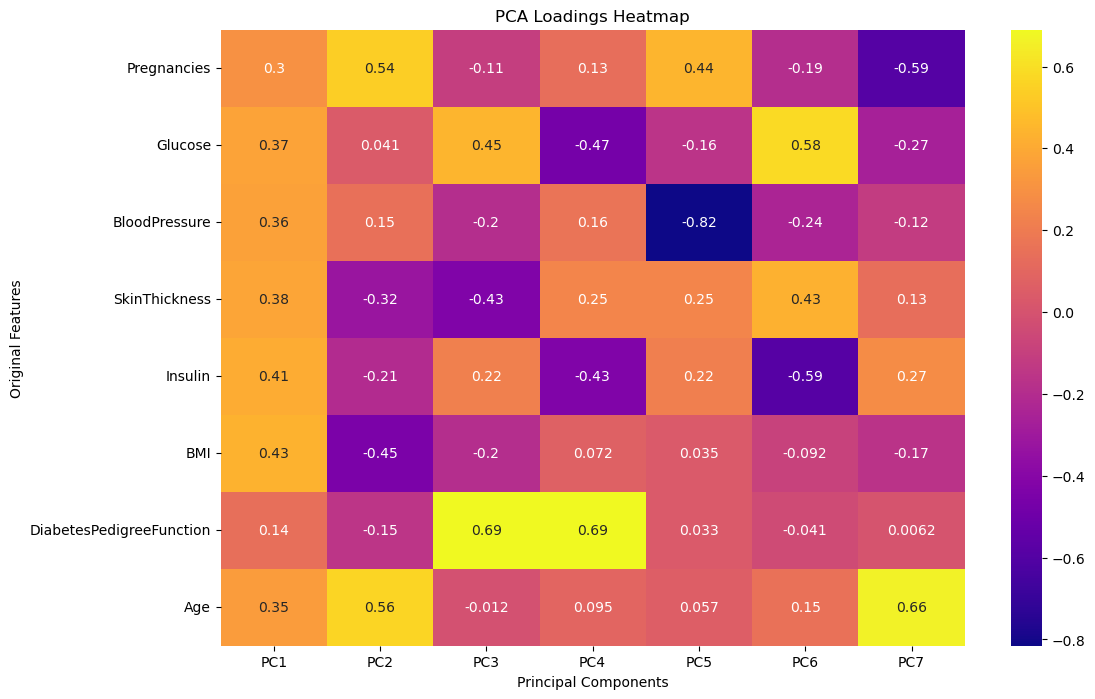

In [55]:
loadings = pca_final.components_.T  # Shape: (number of features, number of components)
loading_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(n_components)], index=X_train.columns)

# Create a heatmap to visualize the importance of each feature to the principal components
plt.figure(figsize=(12, 8))
sns.heatmap(loading_df, cmap='plasma', annot=True, cbar=True)
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.title('PCA Loadings Heatmap')
plt.show()

## BIPLOT

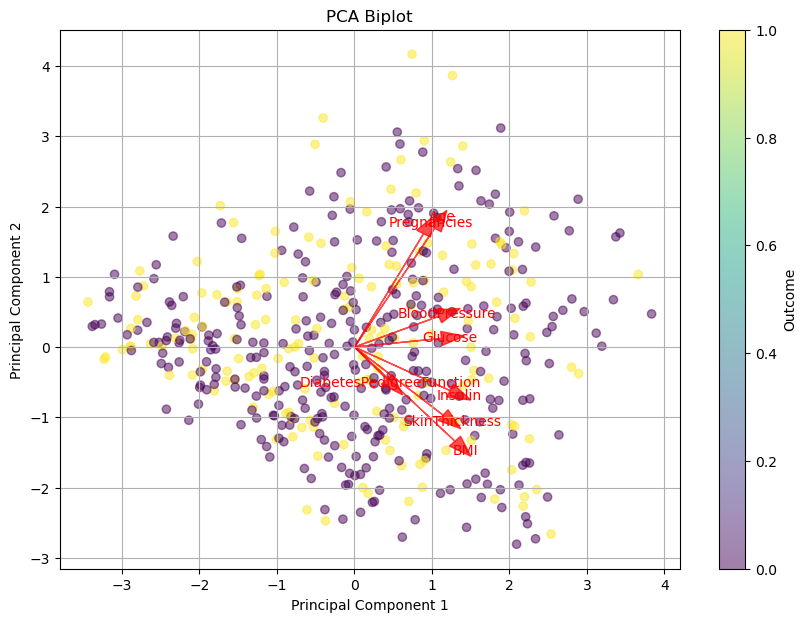

In [57]:
n_components = 2  # Using the 2 components for the biplot
pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_train)


pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Outcome'] = y_train  

# Create the biplot
plt.figure(figsize=(10, 7))

# Plot the points (observations)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Outcome'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')

# Add arrows for loadings
loadings = pca_final.components_.T  # Shape: (number of features, 2)
features = X_train.columns  # Using columns from the original training data

# Scale the arrows for better visualization
arrow_scale = 3  # Adjust this value for arrow size
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0] * arrow_scale, loadings[i, 1] * arrow_scale,
              color='r', alpha=0.7, head_width=0.2)
    plt.text(loadings[i, 0] * arrow_scale * 1.1, loadings[i, 1] * arrow_scale * 1.1,
             feature, color='r', ha='center', va='center')

plt.grid()
plt.colorbar(scatter, label='Outcome')
plt.show()

- **One interesting observation is that Blood Pressure contributes relatively little to PC1 and PC2 compared to other features like Glucose or Pregnancies. This could mean that, while blood pressure might be clinically relevant, it may not be as significant in differentiating diabetic cases in this dataset.**
- **Additionally, Skin Thickness shows minimal contribution to both components, which might be unexpected since it's often considered a factor in metabolic health. This suggests it may not play a crucial role in distinguishing diabetes within this dataset, or its variance aligns closely with other factors.**

### Separation of Diabetic vs. Non-Diabetic:

- While there is no sharp boundary between diabetic and non-diabetic groups, there is a noticeable tendency for diabetic cases (yellow) to cluster more in the positive direction of PC1. This aligns with the influence of Glucose and Pregnancies on PC1, reinforcing that higher values in these features are associated with diabetes.
- Interestingly, DiabetesPedigreeFunction points in a slightly different direction than other significant features, suggesting it provides unique information that isn't entirely captured by PC1 or PC2.

### Principal Component Analysis (PCA):

The biplot represents data points projected onto two main axes—Principal Component 1 (PC1) and Principal Component 2 (PC2). These two components capture the largest variance in the data, simplifying the high-dimensional feature space into a 2D plot.
The colors of the points indicate the Outcome: non-diabetic (closer to 0) and diabetic (closer to 1). Points colored in yellow represent diabetic cases, while darker shades represent non-diabetic cases.

#### Feature Contributions:
 
The red arrows indicate the direction and importance of each feature in this reduced PCA space. The length and direction of each arrow show how strongly each feature contributes to PC1 and PC2.
Glucose and Pregnancies point strongly in the positive direction along PC1, suggesting they are primary contributors to the first component. This implies that higher glucose levels and more pregnancies are influential in distinguishing individuals in the context of this dataset.
BMI and Insulin point in directions that indicate moderate contributions to both PC1 and PC2. This suggests that they are influential but perhaps not as dominant as glucose.

- *In essence, this biplot suggests that glucose and pregnancies are the strongest indicators of diabetes in this dataset, with BMI and insulin as secondary contributors. DiabetesPedigreeFunction adds unique information likely linked to genetic factors, while blood pressure and skin thickness appear less influential. These insights can guide feature selection, feature engineering, and model design to improve diabetes prediction.*

### **WE are now proceeding to FACTOR ANALYSIS**

#### **Reasons to Proceed with Factor Analysis:**

- **Uncovering Latent Constructs:** Factor Analysis can reveal hidden dimensions, such as genetic, lifestyle, or physiological factors, that might drive relationships among features like BMI, insulin, and glucose. This helps in identifying underlying "metabolic health" factors.

- **Using Factor Scores for Predictive Modeling:** We aim to reduce the number of features but retain health-related information, factor scores can act as composite features, simplifying the model and reducing multicollinearity.

- **Validating Feature Clusters:** If there are strong correlations between features, Factor Analysis can confirm and interpret these groupings as latent factors, adding depth to your analysis.

# **FACTOR ANALYSIS**

#### Kaiser-Meyer-Olkin (KMO) Test for Factor Analysis Suitability

In [66]:
kmo_all, kmo_model = calculate_kmo(X_train)
print(f'KMO Model Score: {kmo_model}')

# If KMO score is acceptable (> 0.6), proceed with factor analysis recommendation
if kmo_model > 0.6:
    print("KMO measure is adequate for factor analysis.")
else:
    print("KMO measure is not adequate for factor analysis.")

KMO Model Score: 0.6318284189676524
KMO measure is adequate for factor analysis.


**Inference:** The KMO model score of 0.631 indicates that the dataset has a moderate degree of sampling adequacy. Since the score is above the threshold of 0.6, it suggests that the data is suitable for factor analysis.

# **(A) FACTOR ANALYSIS USING PCA** 

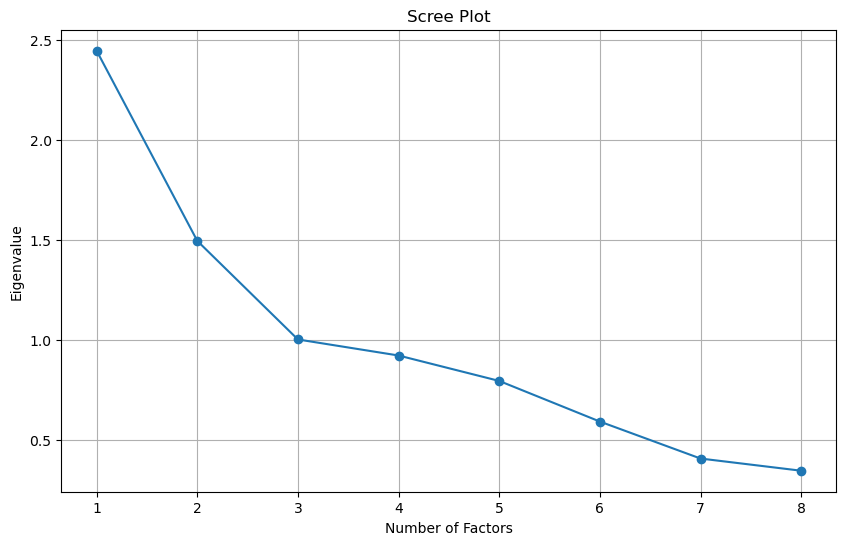

                                 0         1         2
Pregnancies               0.051037  0.579876  0.046950
Glucose                   0.143168  0.169572  0.972743
BloodPressure             0.267869  0.326451  0.118543
SkinThickness             0.568875  0.116782  0.028475
Insulin                   0.411751  0.114134  0.321852
BMI                       0.996194 -0.011624  0.093839
DiabetesPedigreeFunction  0.135639  0.011977  0.094953
Age                       0.012697  0.944644  0.114117


In [69]:
if kmo_model > 0.6:
    # Determine the number of factors using a scree plot
    fa = FactorAnalyzer()
    fa.fit(X_train)
    eigenvalues, _ = fa.get_eigenvalues()

    # Plot the scree plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
    plt.xlabel('Number of Factors')
    plt.ylabel('Eigenvalue')
    plt.title('Scree Plot')
    plt.grid()
    plt.show()

    n_factors = 3
    fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
    fa.fit(X_train)

    # Get factor loadings
    loadings = pd.DataFrame(fa.loadings_, index=dt.columns[:-1])
    print(loadings)
else:
    print("KMO measure is not adequate for factor analysis.")

General Methods used in determining the number of Factors
Below are three common techniques used to determine the number of factors to extract:

Cumulative proportion of at least 0.80 (or 80% explained variance)
Eigenvalues of at least one
Scree plot is based on the "elbow" of the plot; that is, where the plot turns and begins to flatten out

### Eigenvalues:

In scree plot, the first three factors have eigenvalues greater than 1, indicating that they capture significant variance in the data. I have selected these three factors for further analysis

### Factor Loadings and Interpretation:

The loadings table generated shows the correlation of each variable with the extracted factors:

- Factor 0: BMI has a very high loading, which implies this factor is most strongly associated with body composition.

- Factor 1: Age and Pregnancies have strong loadings, suggesting this factor represents demographic aspects.

- Factor 2: Glucose is the most dominant variable in this factor, indicating a strong association with blood glucose regulation. the factor loadings can be used to group variables into meaningful constructs (e.g., body composition, demographics, glucose regulation).

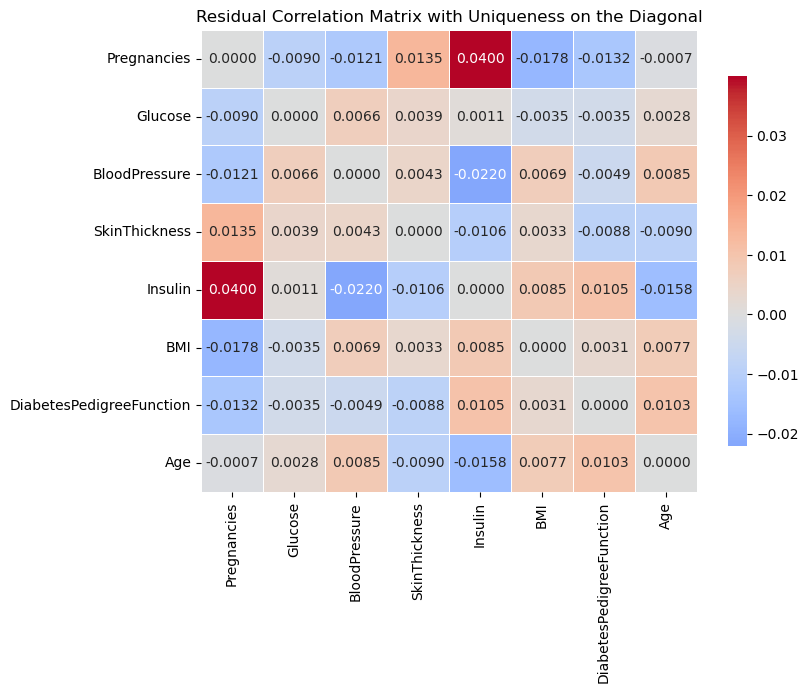

In [73]:
model_implied_corr = fa.loadings_ @ fa.loadings_.T + np.diag(1 - fa.get_communalities())

# Compute the residual correlation matrix
residual_corr_matrix = pd.DataFrame(
    X_train.corr() - model_implied_corr,
    index=dt.columns[:-1],
    columns=dt.columns[:-1]
)

# Plot the residual correlation matrix as a heatmap for better visualization
plt.figure(figsize=(8,6))
sns.heatmap(residual_corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.4f', cbar_kws={'shrink': 0.8})
plt.title('Residual Correlation Matrix with Uniqueness on the Diagonal')
plt.show()

In [74]:
# Calculate communalities
communalities = pd.DataFrame(fa.get_communalities(), index=dt.columns[:-1], columns=['Communalities'])
print("\nCommunalities:")
communalities


Communalities:


,Communalities
Pregnancies,0.341065
Glucose,0.995482
BloodPressure,0.192376
SkinThickness,0.338068
Insulin,0.286154
BMI,1.001343
DiabetesPedigreeFunction,0.027557
Age,0.905536


In [75]:
# Calculate specific variances
specific_variances = 1 - communalities
specific_variances.columns = ['Specific Variances']
print("Specific Variances:")
specific_variances

Specific Variances:


,Specific Variances
Pregnancies,0.658935
Glucose,0.004518
BloodPressure,0.807624
SkinThickness,0.661932
Insulin,0.713846
BMI,-0.001343
DiabetesPedigreeFunction,0.972443
Age,0.094464


#### Negative specific variance is problematic
As variances cannot logically be negative. This could indicate an issue with the factor extraction, such as:
Overfitting, improper factor extraction, or a misfit of the model.
This specific variance being negative suggests that adjustments are necessary, such as increasing the number of factors or changing the extraction method

#### For proceeding with n_factors = 4

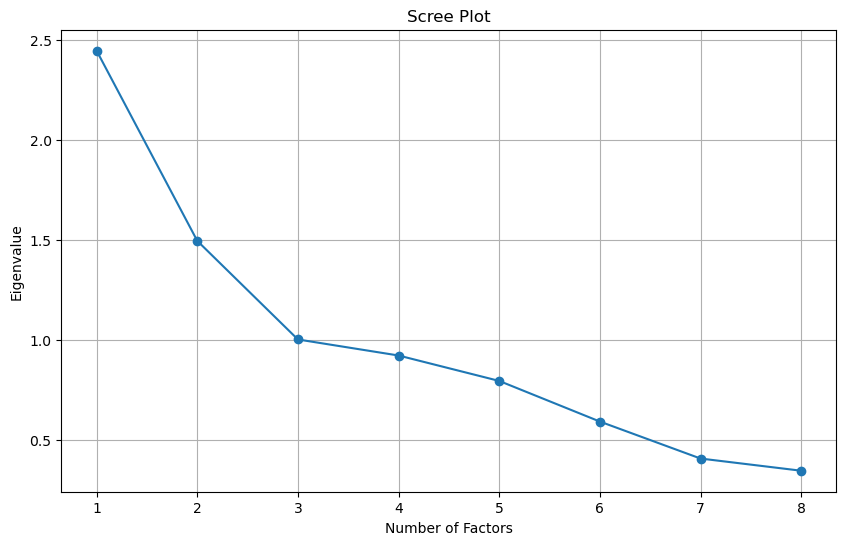

                          Factor 1  Factor 2  Factor 3  Factor 4
Pregnancies               0.054048  0.798909  0.053335  0.105504
Glucose                   0.041796  0.098976  0.738701  0.200652
BloodPressure             0.225584  0.167317  0.144807  0.405508
SkinThickness             0.558211  0.079148  0.101274  0.117566
Insulin                   0.343927  0.123746  0.499447 -0.016253
BMI                       0.964426 -0.054281  0.242250  0.085090
DiabetesPedigreeFunction  0.108598 -0.012029  0.133443  0.033871
Age                      -0.027606  0.614160  0.150407  0.530722


In [78]:
if kmo_model > 0.6:
    # Determine the number of factors using a scree plot
    fa = FactorAnalyzer()
    fa.fit(X_train)
    eigenvalues, _ = fa.get_eigenvalues()

    # Plot the scree plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
    plt.xlabel('Number of Factors')
    plt.ylabel('Eigenvalue')
    plt.title('Scree Plot')
    plt.grid()
    plt.show()

    n_factors = 4
    fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
    fa.fit(X_train)

    # Get factor loadings and update column names
    loadings = pd.DataFrame(fa.loadings_, index=dt.columns[:-1], columns=[f'Factor {i+1}' for i in range(n_factors)])
    print(loadings)
else:
    print("KMO measure is not adequate for factor analysis.")


In [79]:
# Calculate communalities
communalities = pd.DataFrame(fa.get_communalities(), index=dt.columns[:-1], columns=['Communalities'])
print("\nCommunalities:")
communalities


Communalities:


,Communalities
Pregnancies,0.655153
Glucose,0.597483
BloodPressure,0.264289
SkinThickness,0.341942
Insulin,0.383311
BMI,0.998989
DiabetesPedigreeFunction,0.030893
Age,0.682244


In [80]:
# Calculate specific variances
specific_variances = 1 - communalities
specific_variances.columns = ['Specific Variances']
print("Specific Variances:")
specific_variances

Specific Variances:


,Specific Variances
Pregnancies,0.344847
Glucose,0.402517
BloodPressure,0.735711
SkinThickness,0.658058
Insulin,0.616689
BMI,0.001011
DiabetesPedigreeFunction,0.969107
Age,0.317756


#### Some important inference we draw:
4 Factors Improve Fit for Pregnancies, Insulin, and BMI by reducing the unexplained variance and correcting problematic negative values.
3 Factors Are Better for Glucose and Age, where the unexplained variance increased after adding a fourth factor, indicating potential overfitting or unnecessary complexity.
For variables like DiabetesPedigreeFunction and BloodPressure, the 4-factor model does not significantly improve the fit, and these variables remain largely unexplained by common factors.

Specific Variances for 5 factors:
Pregnancies                         0.499650
Glucose                             0.667869
BloodPressure                       0.719929
SkinThickness                       0.650483
Insulin                             0.023033
BMI                                 0.005013
DiabetesPedigreeFunction            0.924907
Age                                 0.263338

5-Factor Model:

Improves variance explanation for Insulin and Age.
Increases unexplained variance for Glucose and Pregnancies, suggesting possible overfitting.
4-Factor Model:

Provides a balanced fit, effectively reducing specific variances without overfitting.
Recommended for avoiding complexity and ensuring a stable model.

## **(B) FACTOR ANALYSIS USING MLE ( without rotation , with rotation )** 

#### **Case 1: MLE without Rotation**
This method uses Maximum Likelihood Estimation to find latent factors without rotating them. This can reveal the main structure but may lack interpretability if factors aren’t aligned with individual variables. 

- Without Rotation (Baseline):

Provides the raw structure of factor loadings.
Helps you understand the unrotated loadings and their alignment with the observed variables.
Aids in identifying the initial number of meaningful factors.

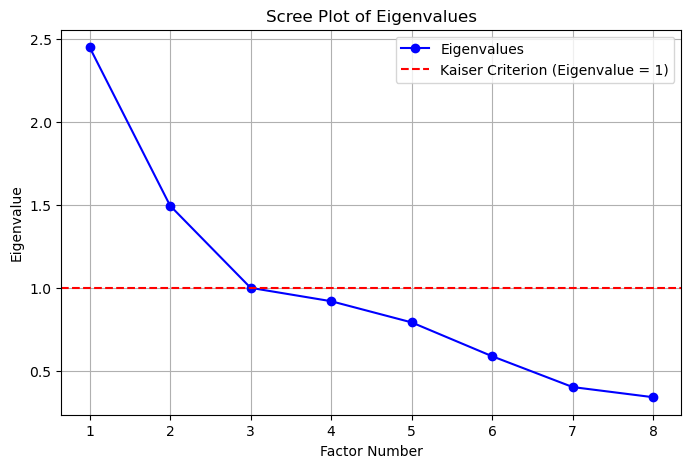

In [85]:
# Fit FactorAnalyzer with all possible factors
fa_full = FactorAnalyzer(n_factors=len(X_train.columns), method='ml', rotation=None)
fa_full.fit(X_train)

# Get eigenvalues
eigenvalues, _ = fa_full.get_eigenvalues()

# Plot Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b', label='Eigenvalues')
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser Criterion (Eigenvalue = 1)')
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid()
plt.legend()
plt.show()

In [86]:
n_factors = 3  
fa_mle = FactorAnalyzer(n_factors=n_factors, method='ml', rotation=None)
fa_mle.fit(X_train)


# Extract factor loadings and visualize
loadings_mle = fa_mle.loadings_
loading_df_mle = pd.DataFrame(loadings_mle, index=X_train.columns, columns=[f'Factor{i+1}' for i in range(n_factors)])
print("MLE Factor Loadings without Rotation:\n")
loading_df_mle

MLE Factor Loadings without Rotation:



,Factor1,Factor2,Factor3
Pregnancies,0.114544,0.578745,-0.095197
Glucose,0.782147,-0.010636,-0.618977
BloodPressure,0.319468,0.316703,0.050028
SkinThickness,0.450826,0.116786,0.353073
Insulin,0.537287,0.050373,0.044048
BMI,0.782077,0.000437,0.619157
DiabetesPedigreeFunction,0.164512,0.006300,0.029488
Age,0.194853,0.882089,-0.214439


In [87]:
# Get eigenvalues and variance explained
eigenvalues, variance_explained = fa_full.get_eigenvalues()

# Calculate total variance (sum of eigenvalues)
total_variance = sum(eigenvalues)

# Calculate proportion of variance explained by each factor
variance_proportion = eigenvalues / total_variance

# Calculate cumulative variance as a percentage of total variance
cumulative_variance_percentage = (variance_proportion.cumsum()) * 100

# Create a DataFrame with cumulative variance in percentage
variance_df = pd.DataFrame({
    "Factor": [f"Factor {i+1}" for i in range(len(eigenvalues))],
    "Eigenvalue": eigenvalues,
    "Cumulative Variance (%)": cumulative_variance_percentage
})

# Print the DataFrame
print("Cumulative Variance Explained (Percentage):")
print(variance_df.to_markdown(index=False))

Cumulative Variance Explained (Percentage):
| Factor   |   Eigenvalue |   Cumulative Variance (%) |
|:---------|-------------:|--------------------------:|
| Factor 1 |     2.44805  |                   30.6006 |
| Factor 2 |     1.49548  |                   49.2941 |
| Factor 3 |     1.00164  |                   61.8146 |
| Factor 4 |     0.921269 |                   73.3304 |
| Factor 5 |     0.793868 |                   83.2538 |
| Factor 6 |     0.590391 |                   90.6337 |
| Factor 7 |     0.405179 |                   95.6984 |
| Factor 8 |     0.344128 |                  100      |


#### Interpretations for Each Factor
- Factor1: Strongly loaded by Glucose and Age, with moderate contributions from Pregnancies and BMI. This factor might represent a general "Metabolic Health" or "Diabetes Risk" factor, as high glucose, BMI, and age are all associated with diabetes risk.

- Factor2: Dominated by BMI with a positive loading of 0.759, indicating Factor2 might reflect "Obesity" or "Body Composition." This also captures some variance in SkinThickness, which could relate to body composition as well.

- Factor3: Primarily has a strong negative loading on Glucose (-0.580), suggesting it could be an inverse glucose-related factor. This factor might capture variability in glucose independent of Factor1’s representation.

- Factor4: Moderate loadings for SkinThickness and Pregnancies, suggesting it may capture aspects related to family history or lifestyle components that affect these characteristics.

- Factor5: Shows a moderate positive loading for Pregnancies (0.415) and SkinThickness but with mixed positive and negative values, making it difficult to directly interpret without rotation.

- Factor6: Low overall loadings, indicating it might not explain much variance or could represent noise.

#### Overall Interpretation
This analysis suggests distinct latent factors likely exist for metabolic health, obesity, and family history/lifestyle influences related to diabetes risk. However, without rotation, these factors are harder to interpret due to the spread of loadings across multiple variables. Applying a Varimax rotation would concentrate loadings, making these factors more distinct and interpretable

#### **Case 2: MLE with Varimax Rotation**

In [90]:
# Fit FactorAnalyzer with 3 factors and apply Varimax rotation
n_factors = 3
fa_rotated = FactorAnalyzer(n_factors=n_factors, method='ml', rotation='varimax')
fa_rotated.fit(X_train)

# Extract rotated factor loadings
loadings_rotated = fa_rotated.loadings_

# Create a DataFrame to display factor loadings
loading_df_rotated = pd.DataFrame(loadings_rotated, index=X_train.columns, columns=[f'Factor{i+1}' for i in range(n_factors)])

# Print rotated factor loadings
print("Factor Loadings with Varimax Rotation:\n")
loading_df_rotated

Factor Loadings with Varimax Rotation:



,Factor1,Factor2,Factor3
Pregnancies,0.037628,0.595171,0.038519
Glucose,0.160101,0.166263,0.970425
BloodPressure,0.278992,0.336137,0.118487
SkinThickness,0.574224,0.105997,0.023977
Insulin,0.427868,0.097771,0.317056
BMI,0.994622,-0.015767,0.074021
DiabetesPedigreeFunction,0.141520,0.018480,0.087202
Age,0.025594,0.920010,0.122311


#### Factor Loadings Interpretation:
- Factor 1:

High Loadings: BMI (0.994622), SkinThickness (0.574224), Insulin (0.427868)
Interpretation: Factor 1 seems to be strongly related to BMI, SkinThickness, and Insulin. These features are often associated with body fat and metabolic factors, so Factor 1 could be interpreted as a factor related to metabolic health or obesity.
- Factor 2:

High Loadings: Age (0.920010), Pregnancies (0.595171)
Interpretation: Factor 2 appears to be related to Age and Pregnancies. It might represent a demographic factor, possibly related to age or reproductive history, as pregnancies could also correlate with age and certain lifestyle factors.
- Factor 3:

High Loadings: Glucose (0.970425)
Interpretation: Factor 3 has a very high loading for Glucose, indicating that it is the main feature driving this factor. This suggests that Factor 3 might represent a glucose metabolism factor or a diabetes-related factor. Elevated glucose levels are closely associated with insulin resistance and diabetes, so this factor may be strongly related to diabetes risk.

#### Key Observations:
Factor 1 (Metabolic/Obesity-related) has high loadings for features like BMI and SkinThickness, which are commonly used to assess body fat and obesity.
Factor 2 seems more demographic, with higher loadings for Age and Pregnancies, which could be linked to age-related health changes and reproductive factors.
Factor 3 is clearly focused on glucose metabolism, with Glucose having the strongest loading on this factor. This likely reflects a factor that distinguishes individuals based on their glucose tolerance or diabetes risk.

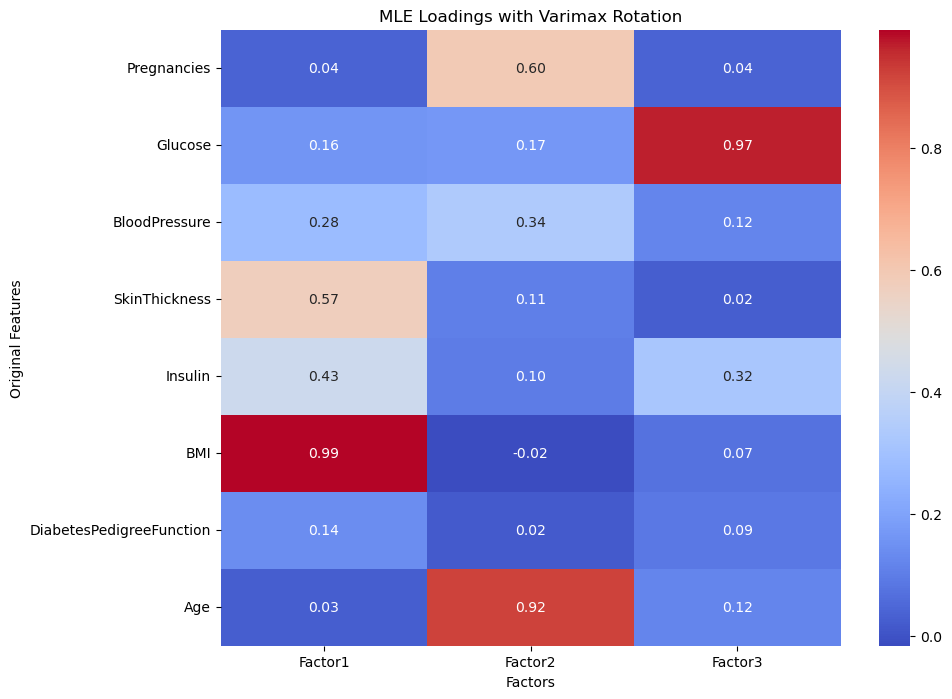

In [92]:
# Plot Heatmap to visualize rotated loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loading_df_rotated, cmap="coolwarm", annot=True, fmt=".2f")
plt.title(f"MLE Loadings with Varimax Rotation")
plt.xlabel("Factors")
plt.ylabel("Original Features")
plt.show()

In [93]:
#Get factor scores (optional)
factor_scores = fa_rotated.transform(X_train)
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor{i+1}' for i in range(n_factors)])

# Print the factor scores
print("\nFactor Scores:\n")
factor_scores_df.head()


Factor Scores:



,Factor1,Factor2,Factor3
0,0.096386,-0.826745,-1.163322
1,-0.580995,1.561273,-0.505382
2,-0.652055,-1.094574,0.874776
3,-1.663352,2.091608,1.249351
4,1.989992,1.008943,-0.082071


# **Residual Analysis**

### **1) Factor Analysis using PCA**

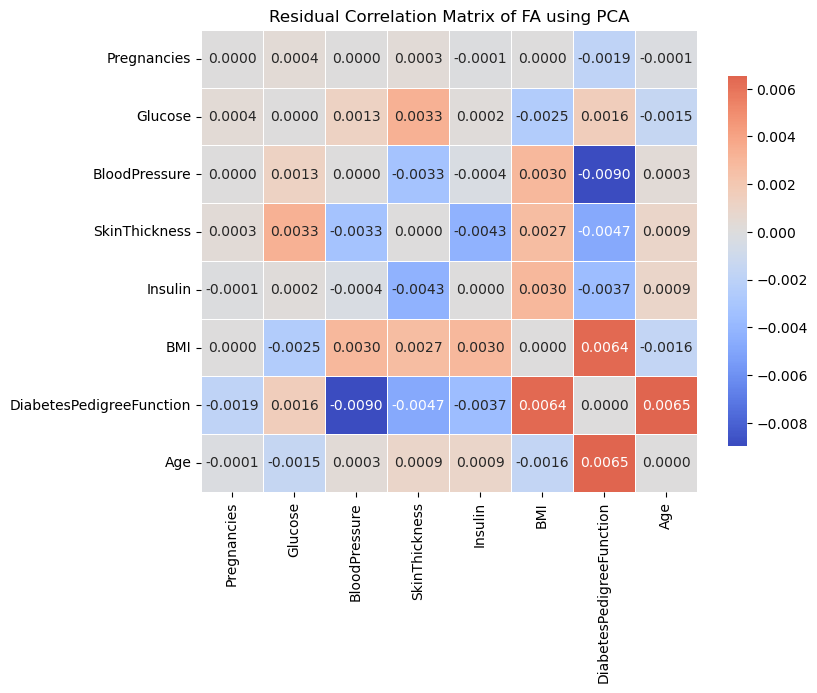

In [96]:
# Calculate Residual Correlation Matrix
# Compute the factor model-implied correlation matrix
model_implied_corr = fa.loadings_ @ fa.loadings_.T + np.diag(1 - fa.get_communalities())

# Compute the residual correlation matrix
residual_corr_matrix = pd.DataFrame(
    X_train.corr() - model_implied_corr,
    index=dt.columns[:-1],
    columns=dt.columns[:-1]
)

# Plot the residual correlation matrix as a heatmap for better visualization
plt.figure(figsize=(8,6))
sns.heatmap(residual_corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.4f', cbar_kws={'shrink': 0.8})
plt.title('Residual Correlation Matrix of FA using PCA')
plt.show()

### **Inference:**  
The Residual Correlation Matrix shows how well the factor model explains the relationships between variables:

- Diagonal Elements 
are close to zero, indicating that the factor model captures most of the variance effectively.

- Off-Diagonal Elements 
mostly have small residuals (ranging from -0.03 to 0.04), which suggests that the model explains the relationships well, though there are some minor residual correlations.

- Notable Residuals:
Pregnancies and Insulin (0.0400) indicate some remaining correlation not fully captured by the factors.

### **2) MLE without rotation**

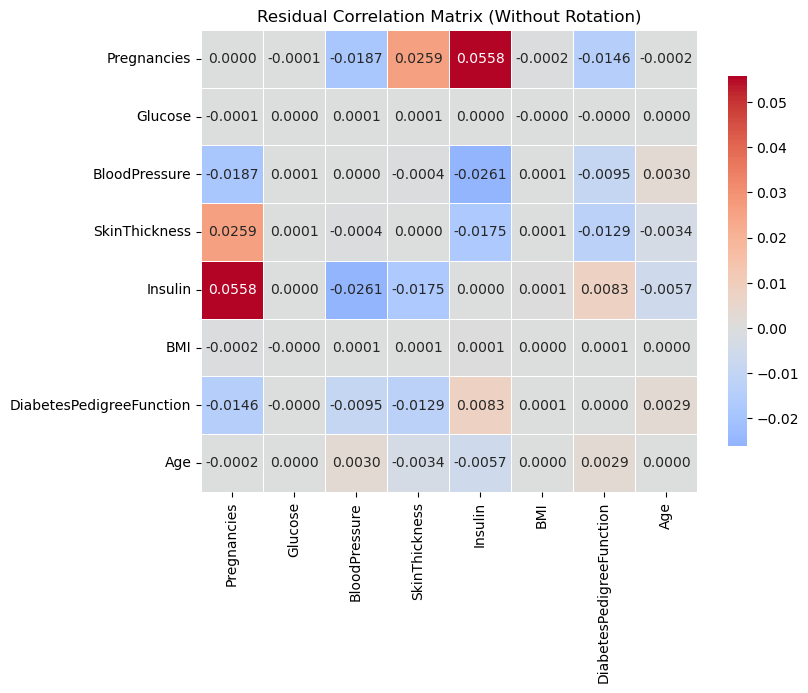

In [99]:
original_corr_matrix = X_train.corr()

# Model-implied correlation matrix (without rotation)
model_implied_corr_without_rotation = fa_mle.loadings_ @ fa_mle.loadings_.T + np.diag(1 - fa_mle.get_communalities())

# Residual correlation matrix (Original - Model-implied without rotation)
residual_corr_matrix_without_rotation = original_corr_matrix - model_implied_corr_without_rotation

# Convert to DataFrame for better representation
residual_corr_matrix_df_without_rotation = pd.DataFrame(
    residual_corr_matrix_without_rotation,
    index=X_train.columns,
    columns=X_train.columns
)

# Plot residual correlation matrix heatmap for the model without rotation
plt.figure(figsize=(8, 6))
sns.heatmap(residual_corr_matrix_df_without_rotation, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.4f', cbar_kws={'shrink': 0.8})
plt.title('Residual Correlation Matrix (Without Rotation)')
plt.show()

In [100]:
print("Cummunalities")
communalities = fa_mle.get_communalities()
communalities_df = pd.Series(communalities, index=X_train.columns)
print(communalities_df)

print("\nSpecific Variance")
specific_variances = fa_mle.get_uniquenesses()
specific_variances_df = pd.Series(specific_variances, index=X_train.columns)
print(specific_variances_df)

Cummunalities
Pregnancies                 0.357129
Glucose                     0.995000
BloodPressure               0.204864
SkinThickness               0.341544
Insulin                     0.293155
BMI                         0.995001
DiabetesPedigreeFunction    0.027974
Age                         0.862033
dtype: float64

Specific Variance
Pregnancies                 0.642871
Glucose                     0.005000
BloodPressure               0.795136
SkinThickness               0.658456
Insulin                     0.706845
BMI                         0.004999
DiabetesPedigreeFunction    0.972026
Age                         0.137967
dtype: float64


### **Overall Interpretation**
- High Communalities (Glucose, BMI, Age): These variables are very well-represented by the factor model, indicating that their variance is largely explained by the underlying factors. They align closely with the common factors and contribute significantly to the factor structure.

- Moderate Communalities (Pregnancies, SkinThickness): These variables are moderately represented by the factors, with about 65-67% of their variance explained. They contribute to the factor structure but also retain a notable amount of unique variance.

- Low Communalities (BloodPressure, Insulin, DiabetesPedigreeFunction): These variables have low communalities, indicating that the factors do not explain much of their variance. Particularly, DiabetesPedigreeFunction has almost no shared variance with the factors. This suggests that these variables may not fit well into the factor model and could be reconsidered or analyzed separately.

Model Implications: The factor model captures most of the variance for some variables but leaves a significant amount unexplained for others. You might consider using additional factors or performing further analysis on low-communality variables to improve the model’s fit.

### **3) MLE with rotation**

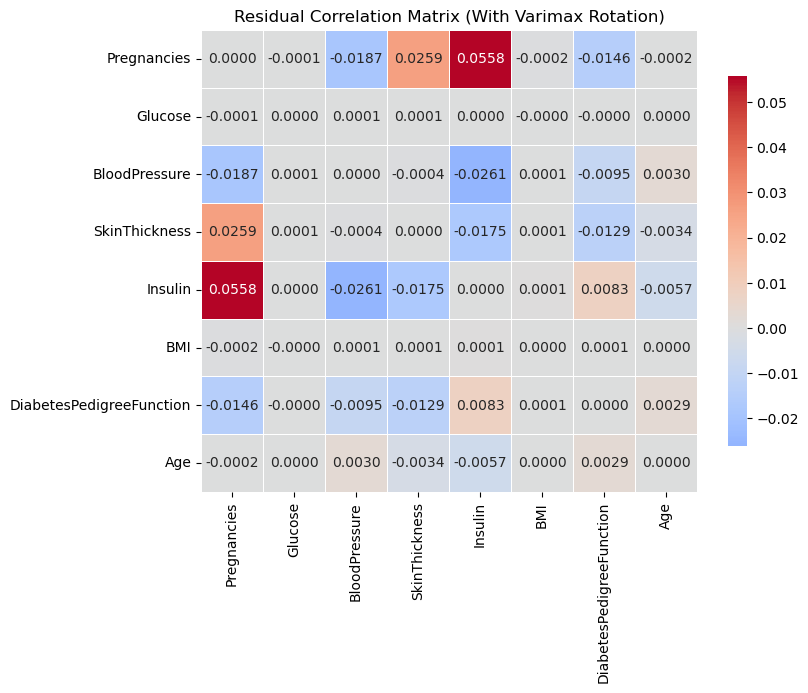

In [103]:
# Model-implied correlation matrix (with rotation)
model_implied_corr_with_rotation = fa_rotated.loadings_ @ fa_rotated.loadings_.T + np.diag(1 - fa_rotated.get_communalities())

# Residual correlation matrix (Original - Model-implied with rotation)
residual_corr_matrix_with_rotation = original_corr_matrix - model_implied_corr_with_rotation

# Convert to DataFrame for better representation
residual_corr_matrix_df_with_rotation = pd.DataFrame(
    residual_corr_matrix_with_rotation,
    index=X_train.columns,
    columns=X_train.columns
)

# Plot residual correlation matrix heatmap for the rotated model
plt.figure(figsize=(8, 6))
sns.heatmap(residual_corr_matrix_df_with_rotation, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.4f', cbar_kws={'shrink': 0.8})
plt.title('Residual Correlation Matrix (With Varimax Rotation)')
plt.show()

In [104]:
# Calculate communalities after rotation
print("Communalities (After Varimax Rotation):")
communalities_rotated = fa_rotated.get_communalities()
communalities_df_rotated = pd.Series(communalities_rotated, index=X_train.columns)
print(communalities_df_rotated)

# Calculate specific variances (uniquenesses) after rotation
print("\nSpecific Variance (After Varimax Rotation):")
specific_variances_rotated = fa_rotated.get_uniquenesses()
specific_variances_df_rotated = pd.Series(specific_variances_rotated, index=X_train.columns)
print(specific_variances_df_rotated)

Communalities (After Varimax Rotation):
Pregnancies                 0.357129
Glucose                     0.995000
BloodPressure               0.204864
SkinThickness               0.341544
Insulin                     0.293155
BMI                         0.995001
DiabetesPedigreeFunction    0.027974
Age                         0.862033
dtype: float64

Specific Variance (After Varimax Rotation):
Pregnancies                 0.642871
Glucose                     0.005000
BloodPressure               0.795136
SkinThickness               0.658456
Insulin                     0.706845
BMI                         0.004999
DiabetesPedigreeFunction    0.972026
Age                         0.137967
dtype: float64


### **Overall Insights**
- **High Communalities:** Variables like Glucose, BMI, and Age remain well-explained by the factors, showing strong alignment with the factor structure after rotation. These variables contribute meaningfully to the model.
- **Moderate to Low Communalities:** Variables like Pregnancies, SkinThickness, and Insulin have moderate-to-low communalities, indicating weaker representation. They may contribute to specific factors but are not as aligned with the factor model.
- **Very Low Communalities:** DiabetesPedigreeFunction and BloodPressure show minimal shared variance with the factors. They are not well-captured by the factors, suggesting these might either need separate analysis or additional factors to better capture their variability.

#### Same residual matrix
The residual correlation matrix remains unchanged with or without rotation because the Varimax rotation only redistributes the variance among the factors without altering the overall model fit or total variance explained. Since the data already exhibits a clear factor structure, rotation has minimal impact on the residuals. Therefore, the model's fit is consistent, and the residuals do not change significantly, allowing me to proceed with the analysis.

## **Selection of Maximum Likelihood Estimation (MLE) for Factor Analysis**

In evaluating the performance of factor analysis methods on our dataset, we compared Principal Component Analysis (PCA) and Maximum Likelihood Estimation (MLE) through their respective residual correlation matrices. The results indicated that the MLE approach yielded smaller residual correlation values compared to PCA, suggesting that MLE better captures the underlying factor structure and provides a closer fit to the observed data. This lower residual correlation implies that MLE more accurately accounts for the shared variance among variables, thereby minimizing unexplained correlations. Consequently, due to MLE’s superior performance in producing a more precise and interpretable factor solution, we have chosen it as the preferred method for this analysis.

# **CANONICAL CORRELATION ANALYSIS**

Canonical Correlation Analysis (CCA) is a statistical method used to understand the relationship between two sets of variables. It seeks to identify and measure the associations between two multivariate variables (sets of variables). CCA finds linear combinations of the variables in each set that are maximally correlated with each other.

The general goal of CCA is to examine the correlation between two sets of variables and find the canonical variables, which are linear combinations of the original variables that have the highest correlation with the corresponding canonical variables from the other set.

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [110]:
# Import necessary libraries
from sklearn.cross_decomposition import CCA

U = X_train[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']]

# Select dependent variables for V
V = X_train[['BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction']]

# Perform CCA with 2 components
cca = CCA(n_components=2)
cca.fit(U, V)

# Transform the data to get the canonical variables
U_c, V_c = cca.transform(U, V)

# Output the first few canonical components for inspection
print("Canonical Components for U (Predictors):\n", U_c[:5])
print("Canonical Components for V (Outcomes):\n", V_c[:5])

Canonical Components for U (Predictors):
 [[-4.21244449e-01 -1.27447067e+00]
 [-3.52784932e-03  1.33577241e+00]
 [-8.02462054e-01 -2.76718418e-01]
 [-6.34349850e-01  3.59433223e+00]
 [ 2.20564254e+00  1.70938960e-01]]
Canonical Components for V (Outcomes):
 [[-0.05614588  0.04849065]
 [ 0.35176279  1.10152642]
 [-1.93357245 -1.07916434]
 [-1.10890169 -1.76805254]
 [ 1.19425571  0.02136507]]


In [111]:
# Calculate the canonical correlation matrix
correlations = np.corrcoef(U_c.T, V_c.T)[:U_c.shape[1], U_c.shape[1]:]
print("Canonical Correlations between U and V:\n", correlations)

# Create DataFrames for the canonical loadings (weights)
U_loadings = pd.DataFrame(cca.x_weights_, index=U.columns, columns=['Canonical Component 1', 'Canonical Component 2'])
V_loadings = pd.DataFrame(cca.y_weights_, index=V.columns, columns=['Canonical Component 1', 'Canonical Component 2'])

Canonical Correlations between U and V:
 [[ 6.40779913e-01 -6.63486300e-17]
 [-5.25032264e-05  2.69981991e-01]]


#### Conclusion
- First Component: A moderate canonical correlation of 0.6408 implies that this component is meaningful in describing the relationship between the predictor and outcome variables.
- Second Component: The very low or near-zero canonical correlation indicates that the second component does not provide much additional insight into the relationship between U and V.

In [113]:
print("\nCanonical Loadings for U (Predictors):\n")
U_loadings


Canonical Loadings for U (Predictors):



,Canonical Component 1,Canonical Component 2
Pregnancies,0.075474,-0.075804
Glucose,0.047948,0.325467
Insulin,-0.050585,-0.053624
BMI,0.945803,-0.303437
Age,0.308061,0.890716


#### **Overall Interpretation:**
- Component 1 seems to capture the relationship between BMI, Age, and possibly some other underlying health factors.
- Component 2 focuses more on the relationship between Age, Glucose, and BMI, with Glucose and Age being positively correlated, and BMI showing a slight negative correlation.

In [115]:
print("\nCanonical Loadings for V (Outcomes):\n")
V_loadings


Canonical Loadings for V (Outcomes):



,Canonical Component 1,Canonical Component 2
BloodPressure,0.469683,0.877895
SkinThickness,0.866625,-0.478630
DiabetesPedigreeFunction,0.168402,0.014610


#### **Overall Interpretation:**
- Component 1 likely represents a combination of skin thickness and blood pressure, reflecting a broader physiological or metabolic aspect of health.
- Component 2 seems to highlight blood pressure as the dominant factor, with SkinThickness contributing negatively to this component. This could indicate a health condition where blood pressure is a key factor, while skin thickness has a less direct or inverse relationship with the outcomes.

#### Summary of Canonical Loadings for Both U (Predictors) and V (Outcomes):

- Component 1 (from both predictors and outcomes) appears to describe a health-related dimension characterized by BMI and age (from U), and by skin thickness and blood pressure (from V).
  
- Component 2 shows more complexity, with Age and Glucose contributing to the predictor side, while BloodPressure and SkinThickness contribute on the outcome side, suggesting a relationship that might involve age, glucose levels, and blood pressure interactions

#### 1. Joint Distribution of Canonical Components
A joint distribution plot can help you visualize the relationship between the canonical components of U and V. This allows you to see how the components of U align with those of V in terms of correlation.

In [119]:
# # Create a figure with 1 row and 2 columns
# plt.figure(figsize=(15, 6))

# # Plot joint distribution of Canonical Component 1 (U vs V)
# plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
# sns.scatterplot(x=U_c_df['Canonical Component 1 (U)'], y=V_c_df['Canonical Component 1 (V)'])
# plt.title("Joint Distribution of Canonical Component 1")
# plt.xlabel("Canonical Component 1 (U)")
# plt.ylabel("Canonical Component 1 (V)")

# # Plot joint distribution of Canonical Component 2 (U vs V)
# plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
# sns.scatterplot(x=U_c_df['Canonical Component 2 (U)'], y=V_c_df['Canonical Component 2 (V)'])
# plt.title("Joint Distribution of Canonical Component 2")
# plt.xlabel("Canonical Component 2 (U)")
# plt.ylabel("Canonical Component 2 (V)")

# # Show the plots
# plt.tight_layout()
# plt.show()

#### 2. Interpretation of Canonical Correlations
Print or visualize the canonical correlations to help understand how well the components of U and V are associated. The higher the canonical correlation, the stronger the relationship between the sets.

In [121]:
# Canonical correlations as a list for easy viewing
canonical_correlations = [np.corrcoef(U_c[:, i], V_c[:, i])[0, 1] for i in range(2)]
print("Canonical Correlations:")
print(f"Component 1: {canonical_correlations[0]:.4f}")
print(f"Component 2: {canonical_correlations[1]:.4f}")

Canonical Correlations:
Component 1: 0.6408
Component 2: 0.2700


#### Summary:
- Component 1 has a moderate canonical correlation, indicating a more meaningful linear relationship between the predictor and outcome variables.
- Component 2 has a weaker correlation, suggesting that the relationship between the second canonical components is not as strong.

#### 3. DataFrame Summary of Canonical Components and Correlations

In [124]:
canonical_summary_df = pd.DataFrame({
    'Canonical Component 1 (U)': U_c[:, 0],
    'Canonical Component 2 (U)': U_c[:, 1],
    'Canonical Component 1 (V)': V_c[:, 0],
    'Canonical Component 2 (V)': V_c[:, 1],
    'Canonical Correlation 1': canonical_correlations[0],
    'Canonical Correlation 2': canonical_correlations[1]
})

# Display the first few rows of the summary DataFrame
print("Canonical Component Summary:")
canonical_summary_df

Canonical Component Summary:


,Canonical Component 1 (U),Canonical Component 2 (U),Canonical Component 1 (V),Canonical Component 2 (V),Canonical Correlation 1,Canonical Correlation 2
0,-0.421244,-1.274471,-0.056146,0.048491,0.64078,0.269982
1,-0.003528,1.335772,0.351763,1.101526,0.64078,0.269982
2,-0.802462,-0.276718,-1.933572,-1.079164,0.64078,0.269982
3,-0.634350,3.594332,-1.108902,-1.768053,0.64078,0.269982
4,2.205643,0.170939,1.194256,0.021365,0.64078,0.269982
...,...,...,...,...,...,...
609,-0.685273,-0.136680,0.373269,-1.082517,0.64078,0.269982
610,-1.678934,0.058403,0.587224,1.299343,0.64078,0.269982
611,2.060587,-0.848138,1.969247,0.424394,0.64078,0.269982
612,1.314043,-0.717162,-0.117418,0.048764,0.64078,0.269982


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Non-hierarchical clustering using K-means

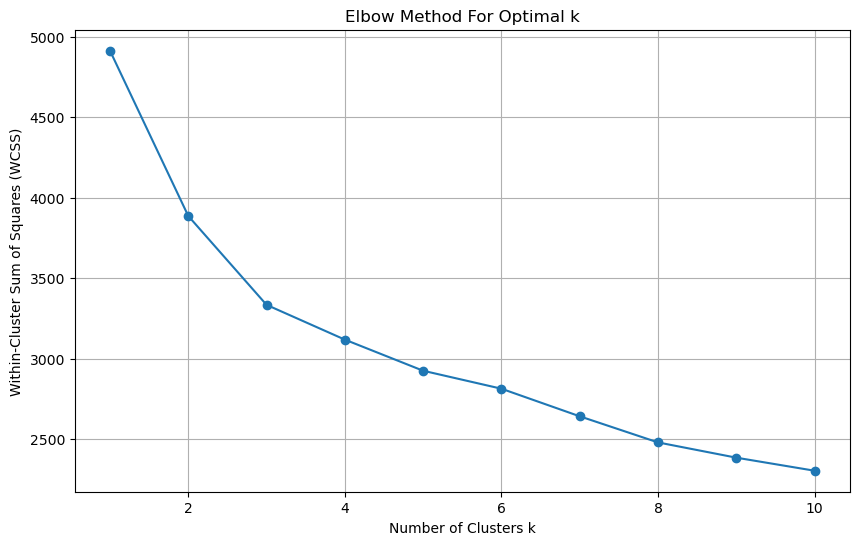

In [127]:
# Determine the optimal number of clusters using the elbow method
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters k')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [233]:
# Apply K-Means with optimal k=6
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_train)

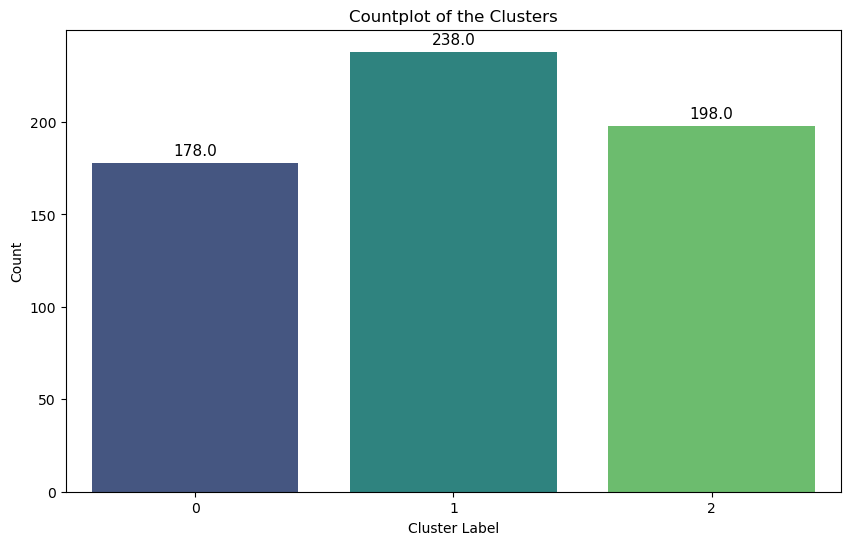

In [235]:
plt.figure(figsize=(10, 6))
sns.countplot(x=clusters, palette="viridis")  # You can use other palettes like "Set1", "Set2", "coolwarm", etc.
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of the Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

#### Cluster Centroids

In [238]:
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Convert centroids to a DataFrame for easier readability
centroids_df = pd.DataFrame(centroids, columns=dt.columns[:-1])  # assuming 'Outcome' is excluded
print("Centroids of Clusters for k=6:")
centroids_df

Centroids of Clusters for k=6:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.140042,0.415627,0.512403,0.158433,0.262044,0.060617,0.024671,1.195793
1,-0.432478,-0.466576,-0.532986,-0.735866,-0.602043,-0.750005,-0.169735,-0.585215
2,-0.505039,0.187190,0.180014,0.742095,0.488092,0.847028,0.181846,-0.371566


#### Visualize K-Means Clustering on PCA Reduced Data

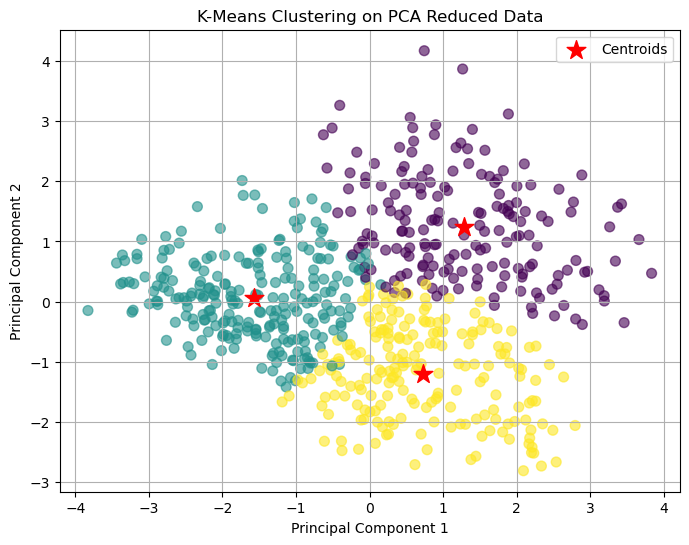

In [241]:
# Perform PCA to reduce data dimensions to 2 for visualization purposes
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_train)

# Create a scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6)
plt.title('K-Means Clustering on PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add cluster centroids to the plot
pca_centroids = pca.transform(centroids)  # Reduce centroids to PCA dimensions
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], c='red', marker='*', s=200, label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

In [243]:
mae = np.mean([
    np.abs(X_train.iloc[i] - kmeans.cluster_centers_[label]).mean()
    for i, label in enumerate(kmeans.labels_)
])

print(f"K-Means MAE: {mae:.4f}")

K-Means MAE: 0.6560


# Hierarchical Clustering using 
- Single linkage
- Complete Linkage
- Average Linkage
- Wald's Linkage

### **Single, Complete, Average Linkage**

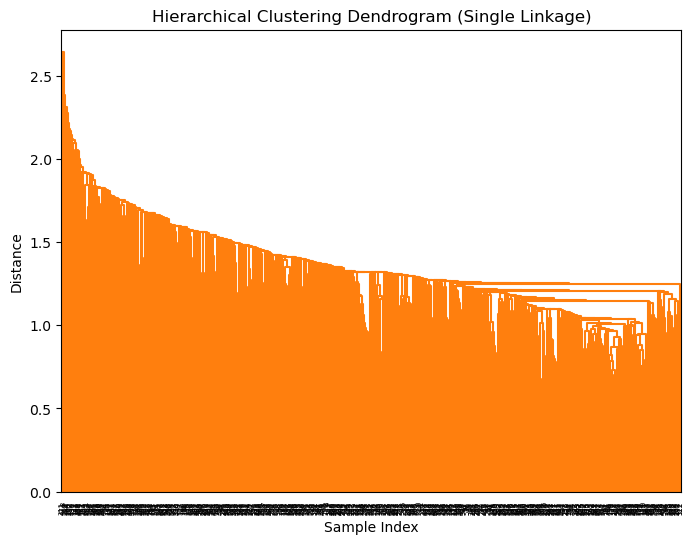

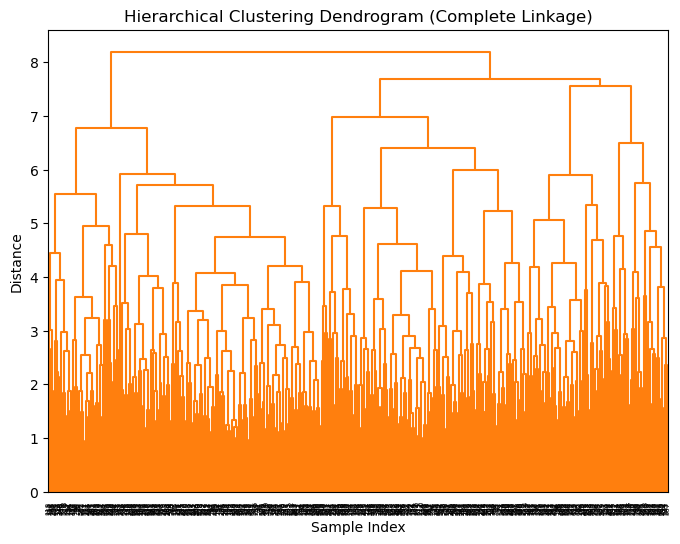

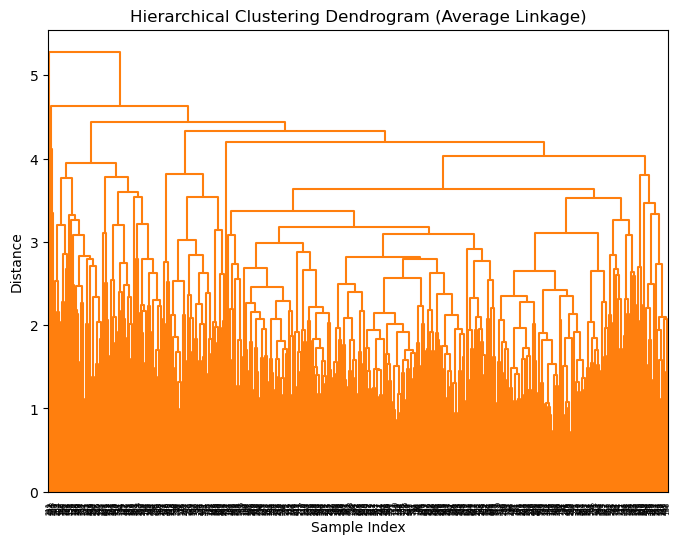

In [137]:
# Hierarchical Clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average']

for method in linkage_methods:
    # Compute the pairwise distances and perform hierarchical clustering
    linkage_matrix = linkage(X_train, method=method)
    
    # Plot the dendrogram
    plt.figure(figsize=(8,6))
    dendrogram(linkage_matrix, labels=list(range(X_train.shape[0])), color_threshold=30)
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    # Add multiple horizontal cut lines to help visualize different cluster options
    cut_heights = [10, 20, 30, 40]
    for height in cut_heights:
        plt.axhline(y=height, color='r', linestyle='--', linewidth=0.8)
    plt.show()

### **Wald's Linkage**

In [139]:
# Compute the pairwise distances and perform hierarchical clustering
linkage_matrix = linkage(X_train, method='ward')

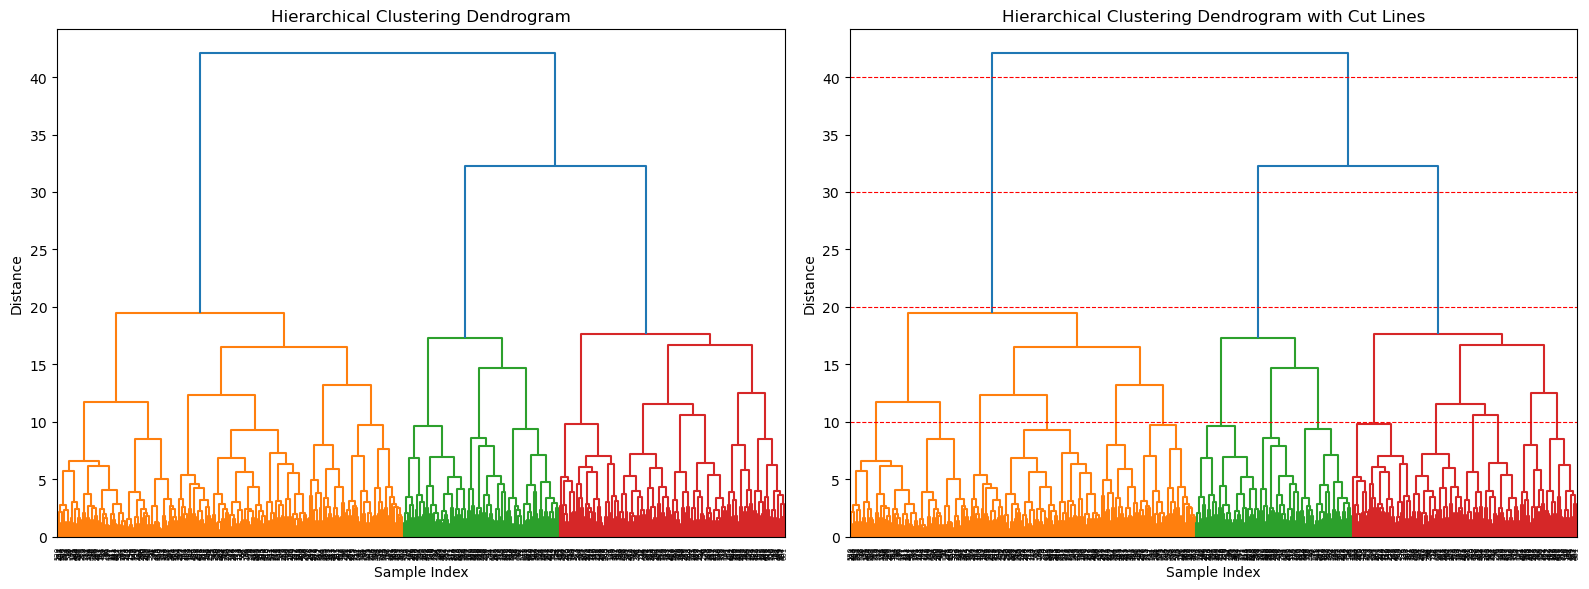

In [140]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(16, 6))

# First plot (original dendrogram)
plt.subplot(1, 2, 1)  # (rows, cols, index)
dendrogram(linkage_matrix, labels=list(range(X_train.shape[0])))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Second plot (dendrogram with cut lines)
plt.subplot(1, 2, 2)  # (rows, cols, index)
dendrogram(linkage_matrix, labels=list(range(X_train.shape[0])), color_threshold=30)
plt.title('Hierarchical Clustering Dendrogram with Cut Lines')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Add multiple horizontal cut lines to help visualize different cluster options
cut_heights = [10, 20, 30, 40]
for height in cut_heights:
    plt.axhline(y=height, color='r', linestyle='--', linewidth=0.8)

# Show both plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### **MAE Comparison of Clustering Methods**

In [142]:
# Define a function to compute MAE for hierarchical clustering methods
def calculate_mae(data, clusters, cluster_centers):
    mae = 0
    for i, cluster in enumerate(clusters):
        mae += np.abs(data.iloc[i] - cluster_centers[cluster - 1]).mean()
    mae /= len(data)
    return mae

# Hierarchical clustering MAE calculations
linkage_methods = ['single', 'complete', 'average', 'ward']
methods_mae = {}

for method in linkage_methods:
    linkage_matrix = linkage(X_train, method=method)
    clusters = fcluster(linkage_matrix, t=6, criterion='maxclust')  # assuming k=6
    cluster_centers = [X_train[clusters == cluster].mean(axis=0) for cluster in np.unique(clusters)]
    mae = calculate_mae(X_train, clusters, cluster_centers)
    methods_mae[f"{method.capitalize()} Linkage"] = mae

# Calculate MAE for K-Means
kmeans = KMeans(n_clusters=6, random_state=42).fit(X_train)
# Manually compute MAE by comparing each point to its assigned cluster center
kmeans_mae = np.mean([
    np.abs(X_train.iloc[i] - kmeans.cluster_centers_[label]).mean() 
    for i, label in enumerate(kmeans.labels_)
])

methods_mae['K-Means'] = kmeans_mae

# Print out MAE values for each clustering method
for method, mae in methods_mae.items():
    print(f"Method: {method}, MAE: {mae:.4f}")

Method: Single Linkage, MAE: 0.7952
Method: Complete Linkage, MAE: 0.6355
Method: Average Linkage, MAE: 0.6982
Method: Ward Linkage, MAE: 0.6211
Method: K-Means, MAE: 0.6016


### **Summary**
The MAE values indicate that K-Means and Ward Linkage are the most effective clustering methods for this dataset, with K-Means achieving the lowest MAE. This suggests that K-Means provides the most accurate clustering in terms of proximity to cluster centers, followed closely by Ward linkage.

# **Canonical Analysis**

# **Modelling - Logistic Regression**

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [147]:
log_reg = LogisticRegression(max_iter=10000)  # Increasing max_iter if needed
log_reg.fit(X_pca_final_df, y_train)  # Fit the model on the PCA-transformed training data

# Predictions on the test data
y_pred = log_reg.predict(X_pca_test_df)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6428571428571429

Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154


Confusion Matrix:
 [[99  0]
 [55  0]]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~